<a href="https://colab.research.google.com/github/gmenendez0/7506R-2C2023-GRUPO07/blob/main/7506R_TP1_GRUPO07_CHP1_ENTREGA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis de tipo de variables:
1. *Hotel*: Cualitativo Nominal
2. *Lead time*: Cuantitativa discreto
3. *Arrival date year*: Cuantitativa discreto
4. *Arrival date month*: Cualitativa Nominal
5. *Arrival date week number*: Cuantitativa discreto
6. *Arrival date day of month*: Cuantitativa discreto
7. *Stays in weekend nights*: Cuantitativa discreto
8. *Stays in week nights*: Cuantitativa discreto
9. *Adults*: Cuantitativa discreto
10. *Children*: Cuantitativa discreto
11. *Babies*: Cuantitativa discreto
12. *Meal*: Cualitativa Ordinal
13. *Country*: Cualitativa Nominal
14. *Market Segment*: Cualitativa Nominal
15. *Distribution Channel*: Cualitativa Nominal
16. *Is Repeated Guest*: Cualitativa Nominal
17. *Previous Cancellations*: Cuantitativa Discreto
18. *Previous Bookings Not Canceled*: Cuantitativa Discreto
19. *Reserved Room Type*: Cualitativa Nominal
20. *Assigned room type*: Cualitativa Nominal
21. *Booking changes*: Cuantitativa Discreto
22. *Deposit type*: Cualitativa Nominal
23. *Agent*: Cualitativa Nominal
24. *Company*: Cualitativa Nominal
25. *Days in waiting list*: Cuantitativo Discreto
26. *Customer type*: Cualitativa Nominal
27. *ADR*: Cuantitativa continuo
28. *Required car parking spaces*: Cuantitativa Discreto
29. *Total of special requests*: Cuantitativa Discreto
30. *ID*: Cualitativa Nominal
31. Is canceled: Cualitativa Nominal

# Preparacion:

Importamos las librerias a utilizar y cargamos el CSV en memoria. Trabajaremos con una copia del CSV para no alterar los datos originales.

In [23]:
import numpy as np
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import pairwise_distances
import scipy as sc

dsHotel = pd.read_csv('hotels_train.csv')
dsHotelCopy = dsHotel.copy()
dsHotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

# Recoleccion de estadisticas de variables cuantitativas
Se obtienen y muestran ciertas estadisticas generales de todas las variables cuantitativas del set de datos.

In [24]:
variablesCuantitativas = ["lead_time", "arrival_date_year", "arrival_date_week_number", "arrival_date_day_of_month",
                          "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies",
                          "previous_cancellations", "previous_bookings_not_canceled",
                          "booking_changes", "days_in_waiting_list", "required_car_parking_spaces", "total_of_special_requests"]
medianas = []
medias = []
modas = []
minimos = []
maximos = []

for variableCuantitativa in variablesCuantitativas:
  medianas.append(dsHotelCopy[variableCuantitativa].median().round(0)) #Mediana
  medias.append(dsHotelCopy[variableCuantitativa].mean().round(0))     #Media (Valor promedio)
  modas.append(dsHotelCopy[variableCuantitativa].mode()[0].round(0))   #Moda
  minimos.append(dsHotelCopy[variableCuantitativa].min())              #Minimo
  maximos.append(dsHotelCopy[variableCuantitativa].max())              #Minimo

medianas.append(dsHotelCopy['adr'].median().round(3))
medias.append(dsHotelCopy['adr'].mean().round(3))
modas.append(dsHotelCopy['adr'].mode()[0].round(3))
minimos.append(dsHotelCopy['adr'].min().round(3))
maximos.append(dsHotelCopy['adr'].max().round(3))

variablesCuantitativas.append("adr")

print("ESTADISTICAS GENERALES DE VARIABLES CUANTITATIVAS:")
estadisticas = {'Mediana': pd.Series(medianas,
          index = variablesCuantitativas),

         'Media': pd.Series(medias,
          index=variablesCuantitativas),

         'Moda': pd.Series(modas,
          index= variablesCuantitativas),

         'Minimo': pd.Series(minimos,
          index= variablesCuantitativas),

         'Maximo': pd.Series(maximos,
          index= variablesCuantitativas)
         }

estadisticasVariablesCuantitativas = pd.DataFrame(estadisticas,  index = variablesCuantitativas)
estadisticasVariablesCuantitativas


ESTADISTICAS GENERALES DE VARIABLES CUANTITATIVAS:


,Mediana,Media,Moda,Minimo,Maximo
lead_time,78.0,112.000,0.0,0.00,629.0
arrival_date_year,2016.0,2016.000,2016.0,2015.00,2017.0
arrival_date_week_number,28.0,27.000,33.0,1.00,53.0
arrival_date_day_of_month,16.0,16.000,17.0,1.00,31.0
stays_in_weekend_nights,1.0,1.000,0.0,0.00,16.0
stays_in_week_nights,2.0,3.000,2.0,0.00,40.0
adults,2.0,2.000,2.0,0.00,55.0
children,0.0,0.000,0.0,0.00,10.0
babies,0.0,0.000,0.0,0.00,9.0
previous_cancellations,0.0,0.000,0.0,0.00,26.0


# Recoleccion de estadisticas de variables cualitativas
Se obtienen y muestran ciertas estadisticas generales de todas las variables cuantitativas del set de datos.

In [25]:
amountOfRows = len(dsHotelCopy)
variablesCualitativas = ["hotel", "country", "arrival_date_month", "meal", "market_segment",
                         "distribution_channel", "is_repeated_guest", "reserved_room_type",
                         "assigned_room_type", "deposit_type", "agent", "company", "customer_type",
                         "id", "is_canceled"]
d_cualitativo= dsHotelCopy[variablesCualitativas]

print("TOP 5 VALORES MAS COMUNES DE CADA VARIABLE CUALITATIVA:")
for variableCualitativa in variablesCualitativas:
  variableTopValues = dsHotelCopy[variableCualitativa].value_counts().head(5)
  i = 0
  print(f"Variable: {variableCualitativa} - Cantidad de valores tomados: {dsHotelCopy[variableCualitativa].nunique()}")

  for topValue in variableTopValues:
    print(str(i + 1) + ". Value: " + str(variableTopValues.index[i]) + " - Times repeated: " + str(topValue) + " - Percentage of total: " + str(round(((topValue * 100) / amountOfRows), 2)))
    i = i + 1
  print()

TOP 5 VALORES MAS COMUNES DE CADA VARIABLE CUALITATIVA:
Variable: hotel - Cantidad de valores tomados: 2
1. Value: City Hotel - Times repeated: 42129 - Percentage of total: 68.05
2. Value: Resort Hotel - Times repeated: 19784 - Percentage of total: 31.95

Variable: country - Cantidad de valores tomados: 149
1. Value: PRT - Times repeated: 27950 - Percentage of total: 45.14
2. Value: GBR - Times repeated: 5733 - Percentage of total: 9.26
3. Value: FRA - Times repeated: 4809 - Percentage of total: 7.77
4. Value: ESP - Times repeated: 4210 - Percentage of total: 6.8
5. Value: DEU - Times repeated: 3312 - Percentage of total: 5.35

Variable: arrival_date_month - Cantidad de valores tomados: 12
1. Value: August - Times repeated: 7176 - Percentage of total: 11.59
2. Value: July - Times repeated: 6524 - Percentage of total: 10.54
3. Value: May - Times repeated: 6159 - Percentage of total: 9.95
4. Value: April - Times repeated: 5878 - Percentage of total: 9.49
5. Value: October - Times repeate

# Analisis de correlacion entre variables
Se grafica en un heatmap los indices de correlacion entre las variables. Podemos destacar las siguientes correlaciones:

**-CORRELACIONES POSITIVAS:**
1.   *Agent* y *Company* - Indice de correlacion:  0.51
2.   *Stays_in_week_nights* y *Stays_in_weekend_nights* - Indice de correlacion:  0.49

**-CORRELACIONES NEGATIVAS:**
1.   *Arrival_date_year* y *Arrival_date_week_number* - Indice de correlacion: -0.54

**-OTRAS CORRELACIONES MAS LEVES:**
1.   *is_repeated_guest* y *previous_bookings_not_canceled* - Indice de correlacion:  0.41
2.   *children* y *adr*  - Indice de correlacion:  0.35
3.   *lead_time* y *is_canceled* - Indice de correlacion: 0.29

**-CORRELACIONES DESTACABLES CON VARIABLE *TARGET*:**
1. *lead_time* y *is_canceled* - Indice de correlacion: 0.29
2. *total_of_special_requests* y *is_canceled* - Indice de correlacion: -0.24
3. *required_car_parking_spaces* y *is_canceled* - Indice de correlacion: -0.23

**Parece** ser que:

-A mayor lead time del cliente, mayor probabilidad de cancelamiento de reserva.

-A mayor cantidad de pedidos especiales hechos por el cliente, menor probabilidad de cancelamiento de reserva.

-A mayor cantidad de espacios para estacionamiento de autos requeridos por el cliente, menor probabilidad de cancelamiento de reserva.

In [26]:
matrizDeCovarianza = dsHotelCopy.cov()
matrizDeCorrelacion = dsHotelCopy.corr()

plt.figure(figsize = (15,8))
sns.heatmap(matrizDeCorrelacion, annot = True, cmap = 'coolwarm', fmt = '.2f')

ValueError: could not convert string to float: 'City Hotel'

#Analisis de distribucion de variables
Aunque previamente se analizo los porcentajes de distribucion de los principales valores de las variables cualitativas, tambien se grafican las distribuciones de algunas de las variables principales para facilitar su analisis.



<Axes: title={'center': 'Reservas por hotel'}, xlabel='Hotel', ylabel='Cant. Reservas'>

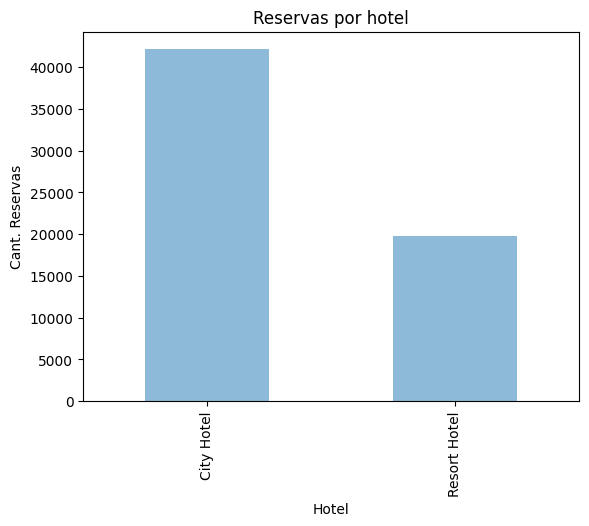

In [ ]:
dsHotelCopy["hotel"].value_counts().plot.bar(alpha=0.5 , title="Reservas por hotel" , xlabel="Hotel" , ylabel="Cant. Reservas")

([<matplotlib.patches.Wedge object at 0x7b85c5e80460>, <matplotlib.patches.Wedge object at 0x7b85c5e2dfc0>], [Text(-0.1673002789044158, 1.0872031165695326, 'Cancelled'), Text(0.1673002789044159, -1.0872031165695326, 'Not Cancelled')], [Text(-0.09125469758422679, 0.5930198817651996, '54.9%'), Text(0.09125469758422684, -0.5930198817651996, '45.1%')])


Text(0.5, 1.0, 'City Hotel Reserve Cancellation Rate')

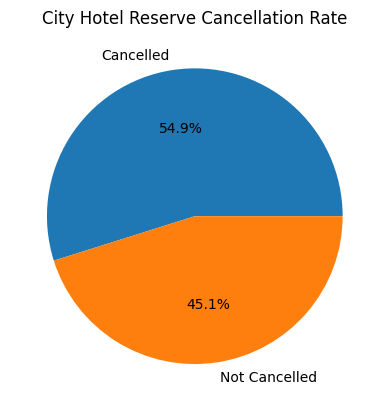

In [ ]:
labels = ["Cancelled", "Not Cancelled"]

#City Hotel
amountOfReservesInCityHotel = len(dsHotelCopy[dsHotelCopy['hotel'] == "City Hotel"])
amountOfCancelledReservesInCityHotel = len(dsHotelCopy[(dsHotelCopy['hotel'] == "City Hotel") & (dsHotelCopy['is_canceled'] == 1)])
amountOfNotCancelledReservesInCityHotel = amountOfReservesInCityHotel - amountOfCancelledReservesInCityHotel

dataCityHotel = [amountOfCancelledReservesInCityHotel, amountOfNotCancelledReservesInCityHotel]

fig, ax = plt.subplots()
print(ax.pie(dataCityHotel, labels=labels, autopct='%1.1f%%'))
plt.title('City Hotel Reserve Cancellation Rate')

([<matplotlib.patches.Wedge object at 0x7b85c5eb6e30>, <matplotlib.patches.Wedge object at 0x7b85c5e83bb0>], [Text(0.35394175834559904, 1.0415014314436757, 'Cancelled'), Text(-0.3539417583455996, -1.0415014314436757, 'Not Cancelled')], [Text(0.19305914091578127, 0.5680916898783686, '39.6%'), Text(-0.19305914091578158, -0.5680916898783684, '60.4%')])


Text(0.5, 1.0, 'Resort Hotel Reserve Cancellation Rate')

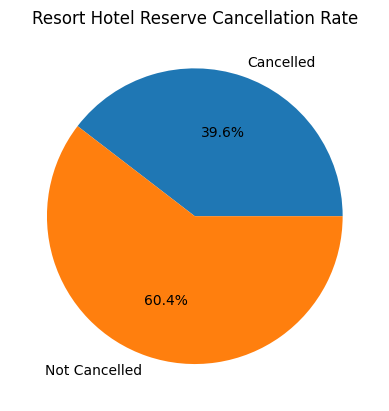

In [ ]:
amountOfReservesInResortHotel = len(dsHotelCopy[dsHotelCopy['hotel'] == "Resort Hotel"])
amountOfCancelledReservesInResortHotel = len(dsHotelCopy[(dsHotelCopy['hotel'] == "Resort Hotel") & (dsHotelCopy['is_canceled'] == 1)])
amountOfNotCancelledReservesInResortHotel = amountOfReservesInResortHotel - amountOfCancelledReservesInResortHotel

#Resort hotel
dataResortHotel = [amountOfCancelledReservesInResortHotel, amountOfNotCancelledReservesInResortHotel]

fig, ax = plt.subplots()
print(ax.pie(dataResortHotel, labels=labels, autopct='%1.1f%%'))
plt.title('Resort Hotel Reserve Cancellation Rate')


<Axes: title={'center': 'Reservas canceladas'}, xlabel='Cancelado (1 = True)', ylabel='Cant. Reservas'>

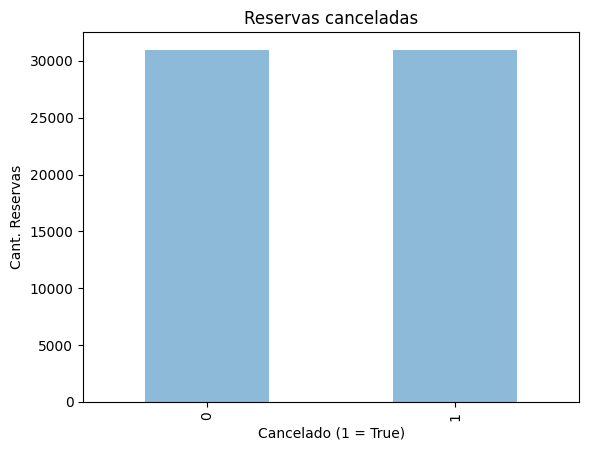

In [ ]:
dsHotelCopy["is_canceled"].value_counts().plot.bar(alpha=0.5 , title="Reservas canceladas" , xlabel="Cancelado (1 = True)" , ylabel="Cant. Reservas")

<Axes: title={'center': 'Requerimientos especiales solicitados'}, xlabel='Cantidad de solicitudes especiales', ylabel='Cant. Reservas'>

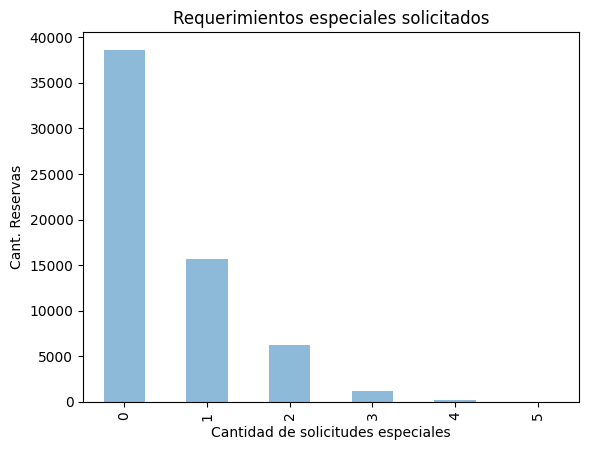

In [ ]:
dsHotelCopy["total_of_special_requests"].value_counts().plot.bar(alpha=0.5 , title="Requerimientos especiales solicitados" , xlabel="Cantidad de solicitudes especiales" , ylabel="Cant. Reservas")

[Text(0.5, 1.0, 'Reservas realizadas en cada semana del año'),
 Text(0.5, 0, 'Semana del año'),
 Text(0, 0.5, 'Cant. Reservas')]

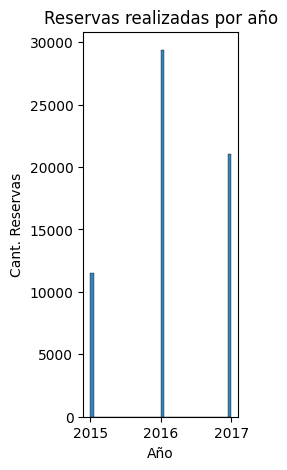

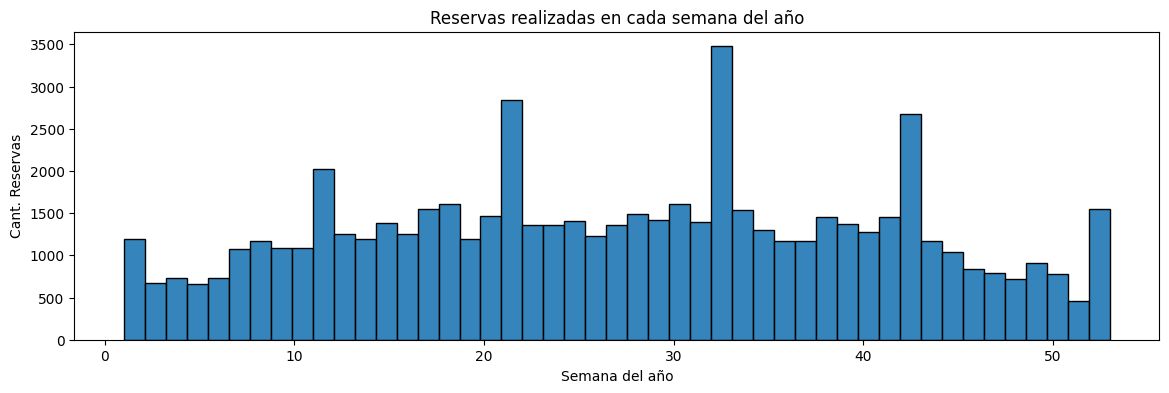

In [ ]:
plt.figure(figsize = (2,5))
sns.histplot(data=dsHotelCopy['arrival_date_year'], alpha = 0.9).set(title="Reservas realizadas por año",xlabel="Año",ylabel="Cant. Reservas")
plt.figure(figsize = (14,4))
sns.histplot(data=dsHotelCopy['arrival_date_week_number'], alpha = 0.9).set(title="Reservas realizadas en cada semana del año",xlabel="Semana del año",ylabel="Cant. Reservas")

#Transformacion de datos
Buscamos que nuestro dataset exprese variables de una forma mas conscisa y mas clara, para que resulten mas homogeneos los tipos de datos y mas sencillos para trabajar, por ejemplo expresar los meses en numeros enteros.
Agregamos nuevas categorias

In [27]:
dsHotelCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  object 
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  float64
 10  babies                          61913 non-null  int64  
 11  meal                            61913 non-null  object 
 12  country                         

In [ ]:
meses_a_numeros = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
dsHotelCopy['arrival_date_month'] = dsHotelCopy['arrival_date_month'].map(meses_a_numeros)

In [ ]:
def verificar_enteros_disfrazados(datos):
    enteros_disfrazados = True
    for valor in datos:
        valor_str = str(valor)
        partes = valor_str.split('.')
        if len(partes) > 1 and partes[1] != '0':
            enteros_disfrazados = False
            break
    if enteros_disfrazados:
        print("Los valores son enteros disfrazados como flotantes.")
    else:
        print("Los valores son flotantes genuinos.")


In [ ]:
variables_flotantes = ["children", "agent", "company"]

for categoria in variables_flotantes:
  dsHotelCopy[categoria].fillna(-10000, inplace=True)
  dsHotelCopy[categoria] = dsHotelCopy[categoria].astype('Int64')
  dsHotelCopy[categoria].replace(-10000, np.nan, inplace=True)
  verificar_enteros_disfrazados(dsHotelCopy[categoria])
dsHotelCopy.info()

Los valores son enteros disfrazados como flotantes.
Los valores son enteros disfrazados como flotantes.
Los valores son enteros disfrazados como flotantes.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61913 non-null  object 
 1   lead_time                       61913 non-null  int64  
 2   arrival_date_year               61913 non-null  int64  
 3   arrival_date_month              61913 non-null  int64  
 4   arrival_date_week_number        61913 non-null  int64  
 5   arrival_date_day_of_month       61913 non-null  int64  
 6   stays_in_weekend_nights         61913 non-null  int64  
 7   stays_in_week_nights            61913 non-null  int64  
 8   adults                          61913 non-null  int64  
 9   children                        61909 non-null  Int64  
 10

### Visualizamos la cantidad de reservas que tiene cada mes para poder ver cuales meses tienen mayor cantidad de reservas y de ahi sacar por ejemplo los meses de temporada alta

<BarContainer object of 12 artists>

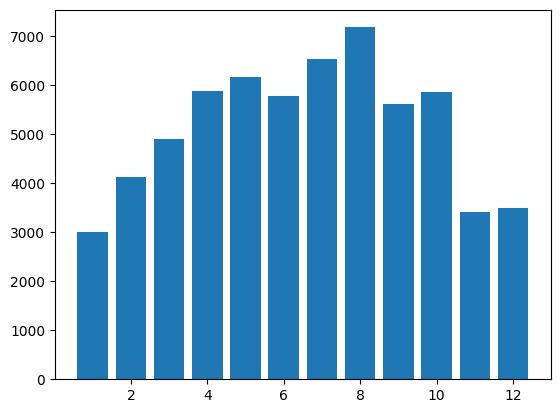

In [ ]:
plt.bar(dsHotelCopy['arrival_date_month'].value_counts().index, dsHotelCopy['arrival_date_month'].value_counts().values)

A partir de lo visualizado, tomamos como umbral la mediana y de ahi creamos una nueva categoria high_season_month en donde si dicho mes tiene mas reservas que la median entonces tiene un 1 (es de temporada alta) y sino un 0 (es de temporada baja)

In [ ]:
mediana_meses = dsHotelCopy['arrival_date_month'].value_counts().median()
dsHotelCopy['high_season_month'] = dsHotelCopy['arrival_date_month'].apply(lambda x: 1 if dsHotelCopy['arrival_date_month'].value_counts()[x] > mediana_meses else 0)
dsHotelCopy['high_season_month'].value_counts()

1    37372
0    24541
Name: high_season_month, dtype: int64

# Visualizacion de los datos

## Visualizaciones interesantes

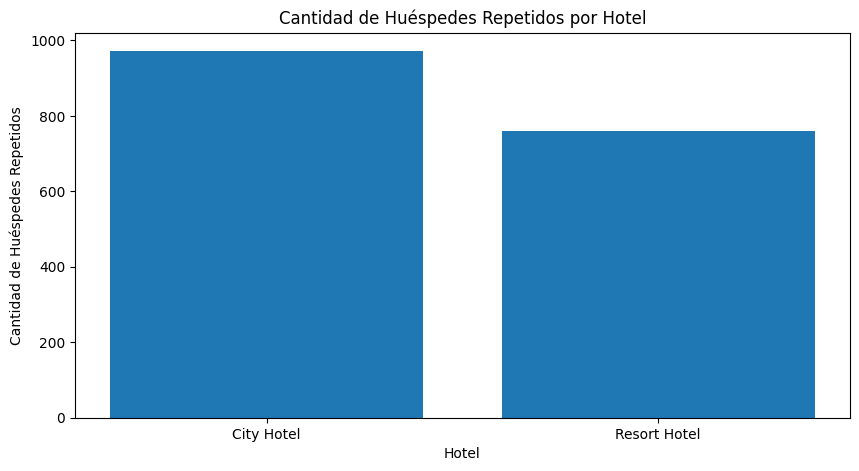

In [ ]:
reapeatedGuestsPerHotel = dsHotelCopy.groupby('hotel')['is_repeated_guest'].sum().reset_index()
plt.figure(figsize=(10, 5))
plt.bar(reapeatedGuestsPerHotel['hotel'], reapeatedGuestsPerHotel['is_repeated_guest'])
plt.xlabel('Hotel')
plt.ylabel('Cantidad de Huéspedes Repetidos')
plt.title('Cantidad de Huéspedes Repetidos por Hotel')
plt.show()

<Figure size 1000x600 with 0 Axes>

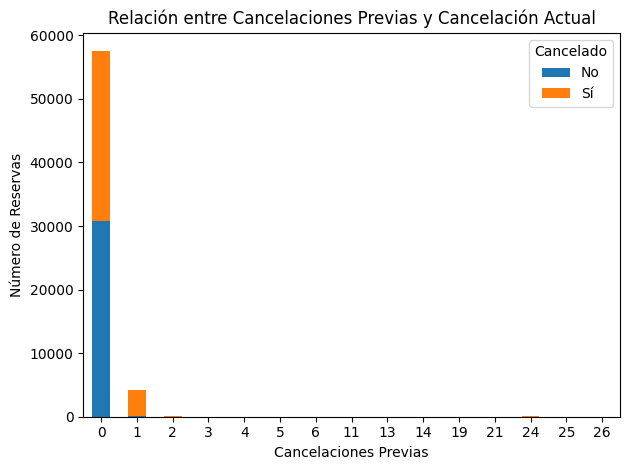

In [ ]:
data = dsHotelCopy.groupby(['previous_cancellations', 'is_canceled']).size().unstack().fillna(0)

plt.figure(figsize=(10, 6))
data.plot(kind='bar', stacked=True)
plt.xlabel('Cancelaciones Previas')
plt.ylabel('Número de Reservas')
plt.title('Relación entre Cancelaciones Previas y Cancelación Actual')
plt.xticks(rotation=0)
plt.legend(title='Cancelado', labels=['No', 'Sí'])
plt.tight_layout()

plt.show()

### Primero filtramos las variables que consideramos del tipo categoricas (sacando aquellas que son booleanas y que podemos convertir mediante algun metodo de encoding en variables numericas, ademas quitamos variables como 'id' pues no aportan nada al analisis de la visualizacion).
### En las variables que tienen muchos valores unicos (como country) pusimos un top 10 valores mas frecuentes mas el resto y lo agregamos a un nuevo dataframe ds_variables_categoricas

In [29]:
ds_variables_categoricas = dsHotelCopy.select_dtypes(include=['object'])
ds_variables_categoricas['country_top_10_and_others'] = ds_variables_categoricas['country'].where(
ds_variables_categoricas['country'].isin(ds_variables_categoricas['country'].value_counts().nlargest(10).index), 'Others')
ds_variables_categoricas.drop('id',axis=1, inplace=True)
ds_variables_categoricas.drop('country',axis=1, inplace=True)
ds_variables_categoricas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61913 entries, 0 to 61912
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   hotel                      61913 non-null  object
 1   arrival_date_month         61913 non-null  object
 2   meal                       61913 non-null  object
 3   market_segment             61913 non-null  object
 4   distribution_channel       61913 non-null  object
 5   reserved_room_type         61913 non-null  object
 6   assigned_room_type         61913 non-null  object
 7   deposit_type               61913 non-null  object
 8   customer_type              61913 non-null  object
 9   country_top_10_and_others  61913 non-null  object
dtypes: object(10)
memory usage: 4.7+ MB


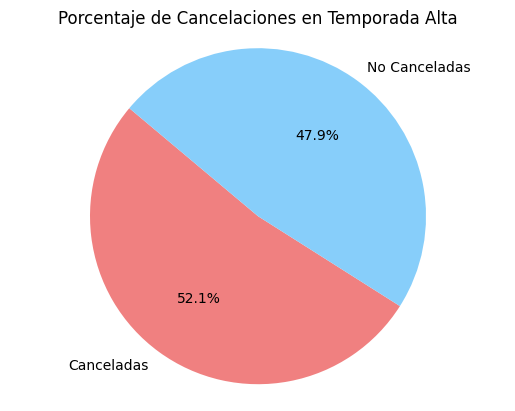

In [ ]:
high_season_samples = dsHotelCopy[dsHotelCopy['high_season_month'] == 1]
canceled_high_season_samples = high_season_samples[high_season_samples['is_canceled'] == True]
num_canceladas = len(canceled_high_season_samples)
num_no_canceladas = len(high_season_samples) - num_canceladas
valores = [num_canceladas, num_no_canceladas]
etiquetas = ['Canceladas', 'No Canceladas']
colores = ['lightcoral', 'lightskyblue']
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Porcentaje de Cancelaciones en Temporada Alta')
plt.show()

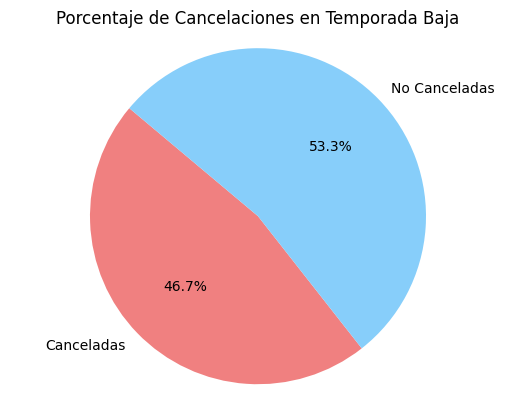

In [ ]:
high_season_samples = dsHotelCopy[dsHotelCopy['high_season_month'] == 0]
canceled_high_season_samples = high_season_samples[high_season_samples['is_canceled'] == True]
num_canceladas = len(canceled_high_season_samples)
num_no_canceladas = len(high_season_samples) - num_canceladas
valores = [num_canceladas, num_no_canceladas]
etiquetas = ['Canceladas', 'No Canceladas']
colores = ['lightcoral', 'lightskyblue']
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Porcentaje de Cancelaciones en Temporada Baja')
plt.show()

Podemos decir que hay mayor cantidad de cancelaciones en temporada alta que en temporada baja,

## Visualizacion variabes categoricas
Primero filtramos las variables que consideramos del tipo categoricas (sacando aquellas que son booleanas y que podemos convertir mediante algun metodo de encoding en variables numericas, ademas quitamos variables como 'id' pues no aportan nada al analisis de la visualizacion).
En las variables que tienen muchos valores unicos (como country) pusimos un top 10 valores mas frecuentes mas el resto y lo agregamos a un nuevo dataframe ds_variables_categoricas

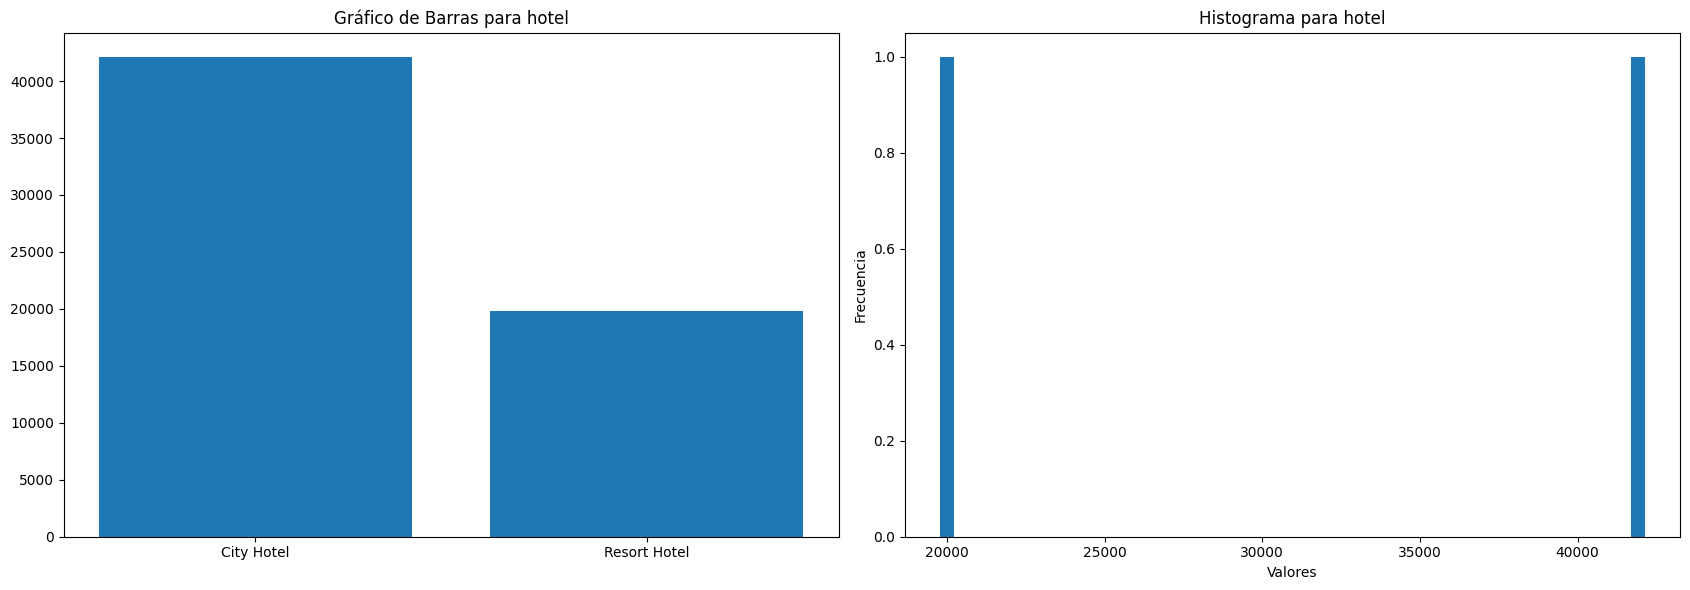

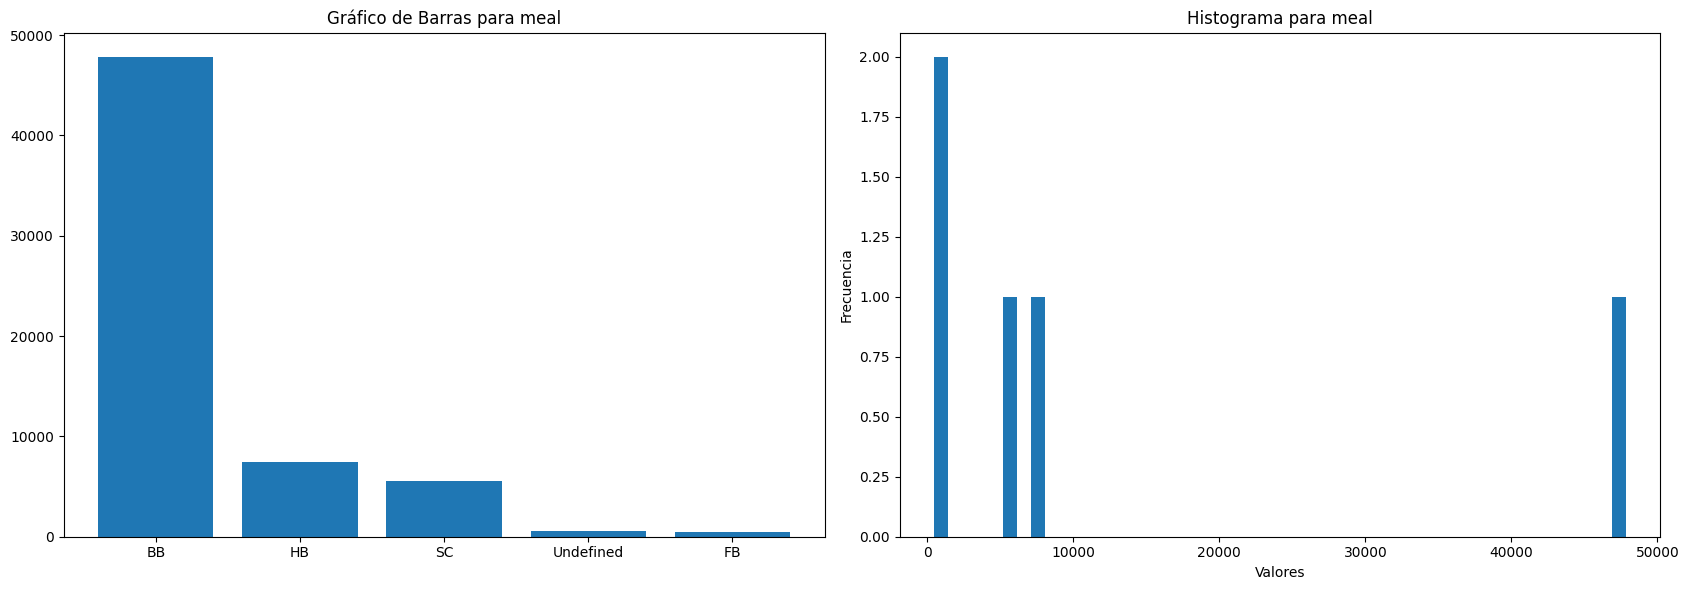

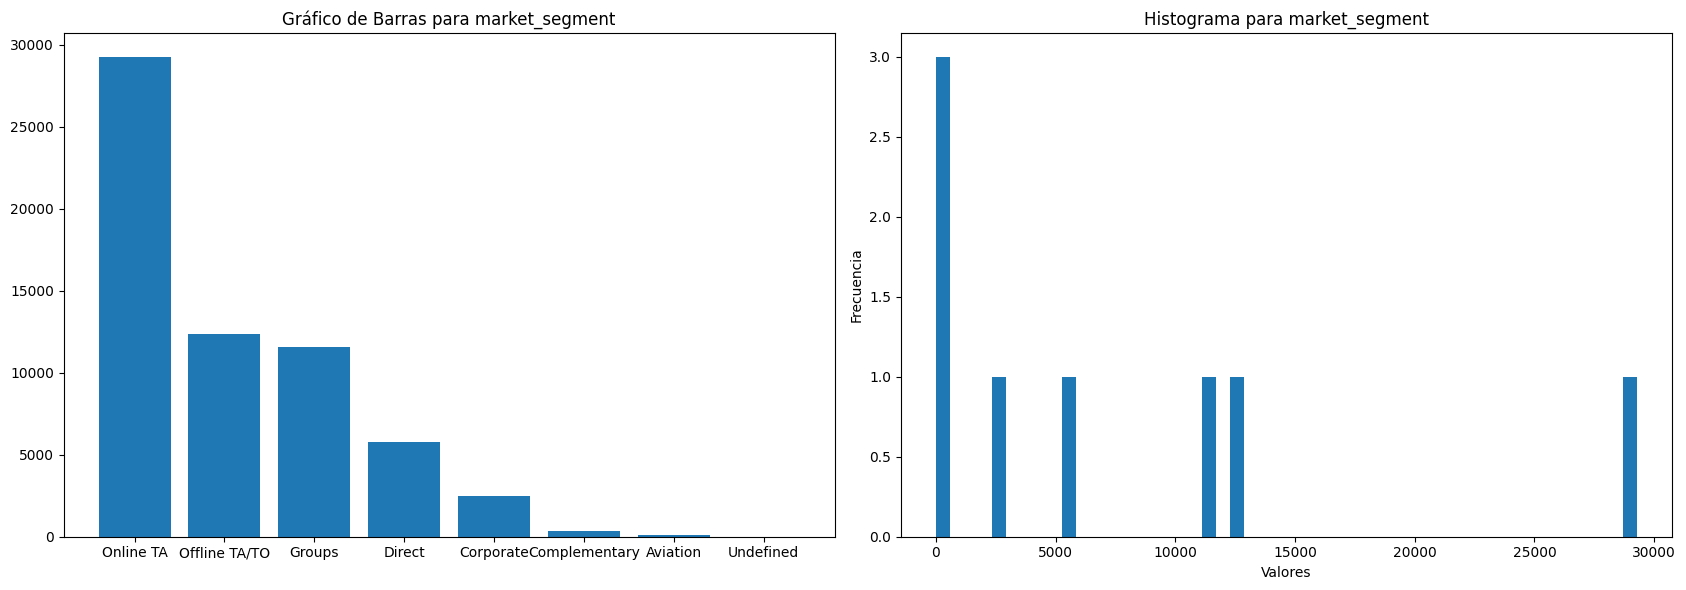

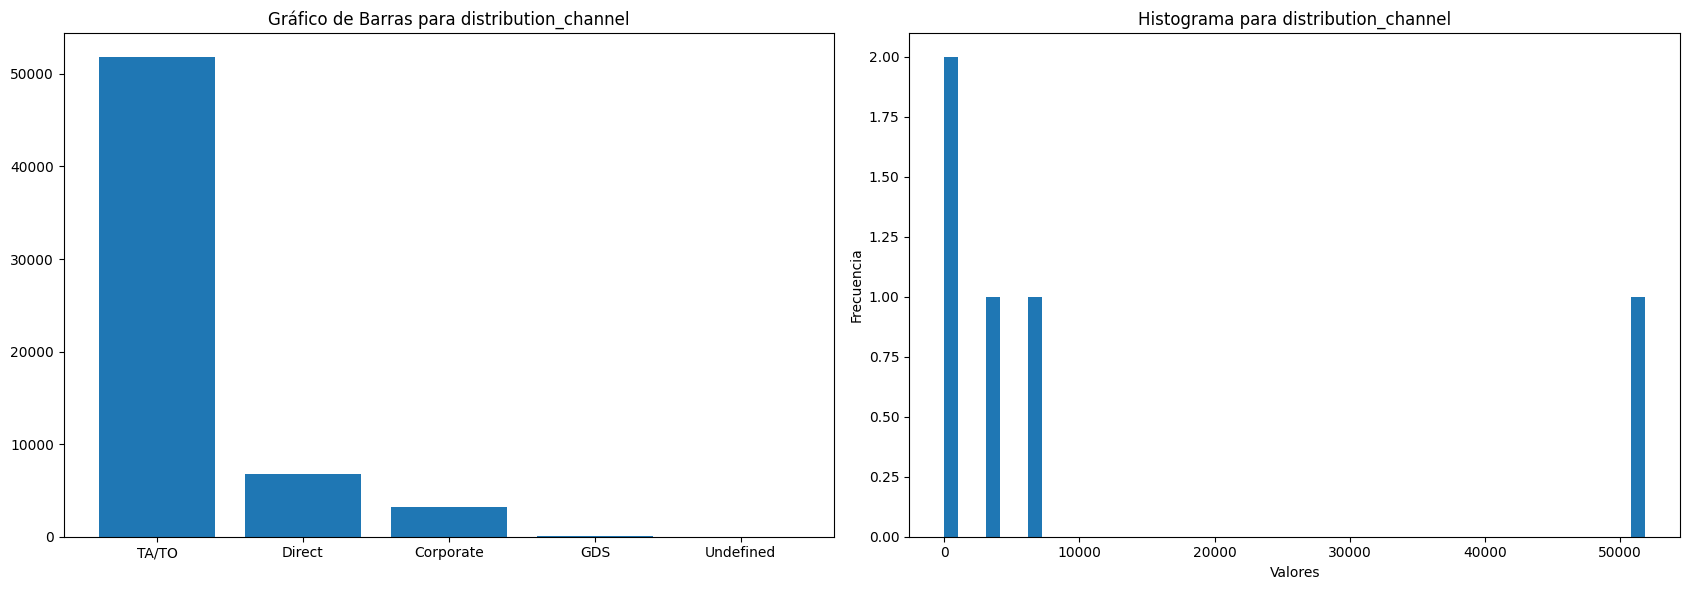

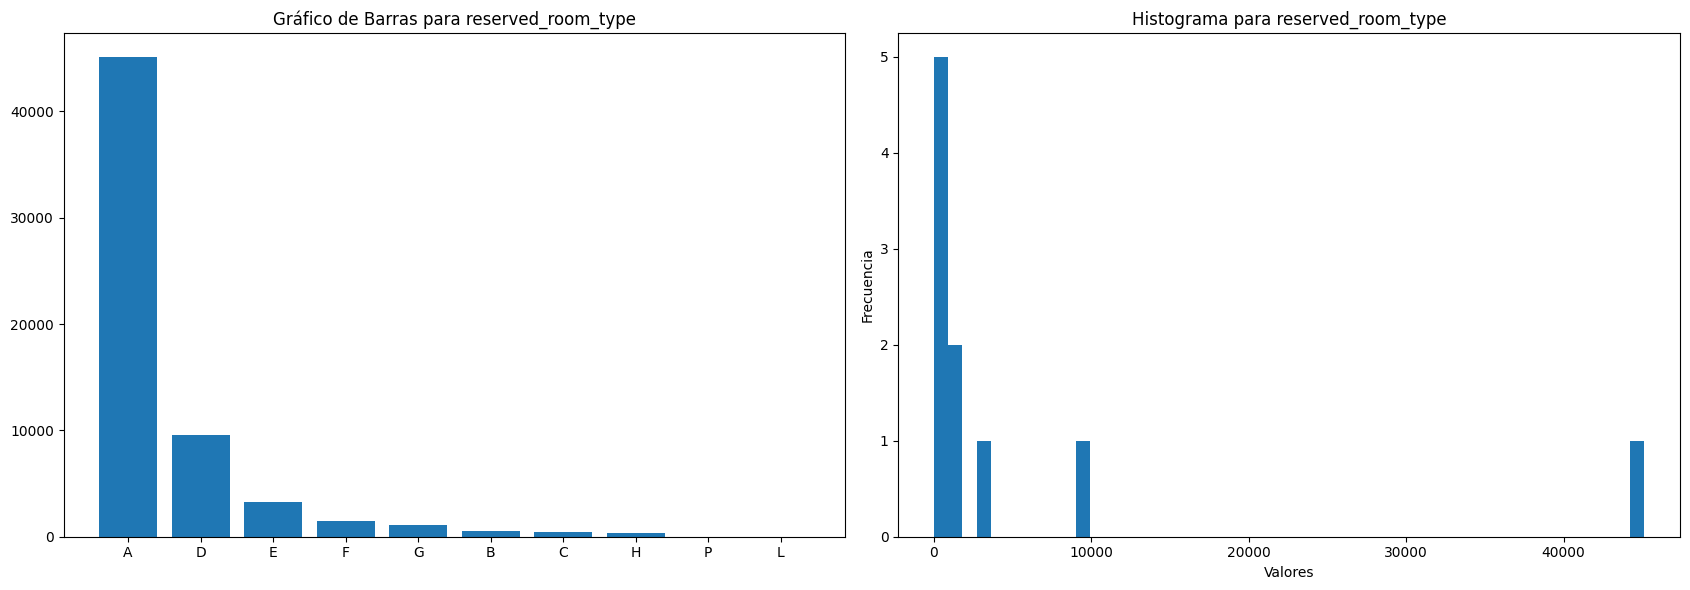

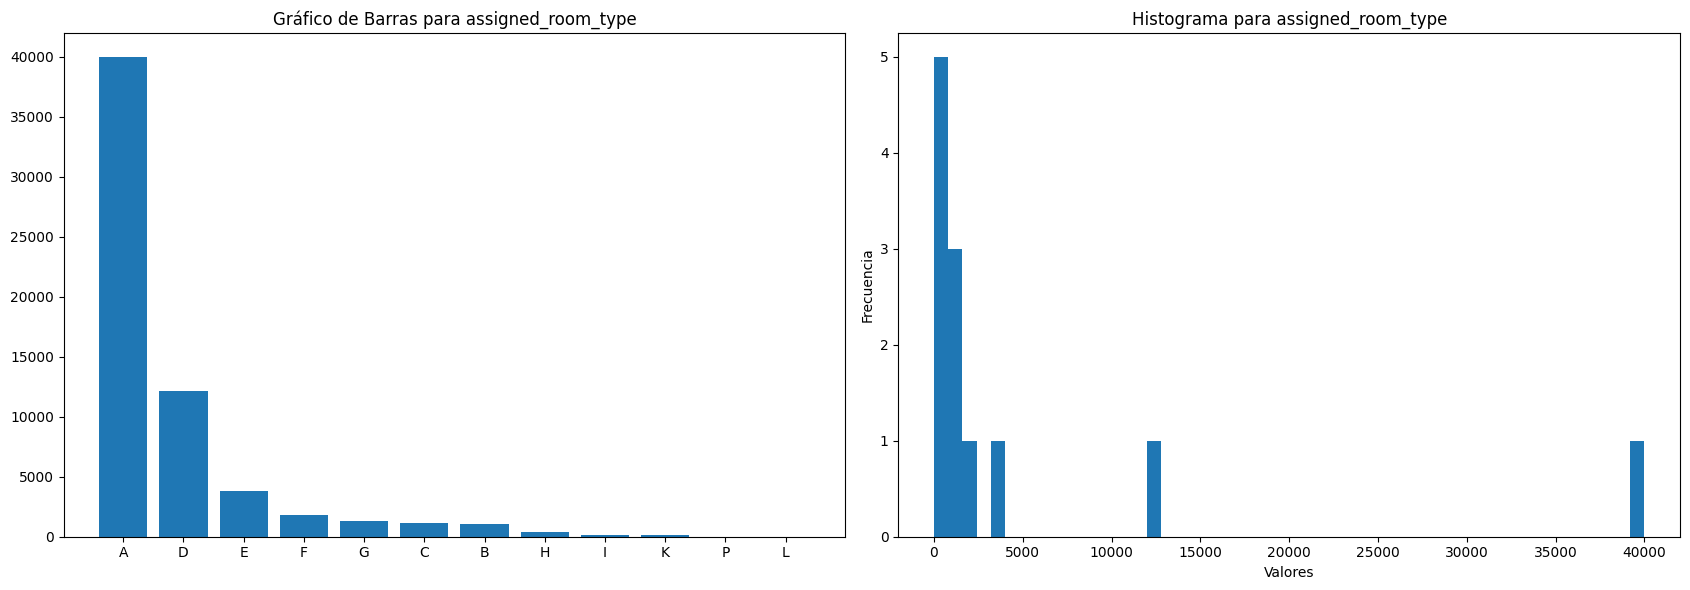

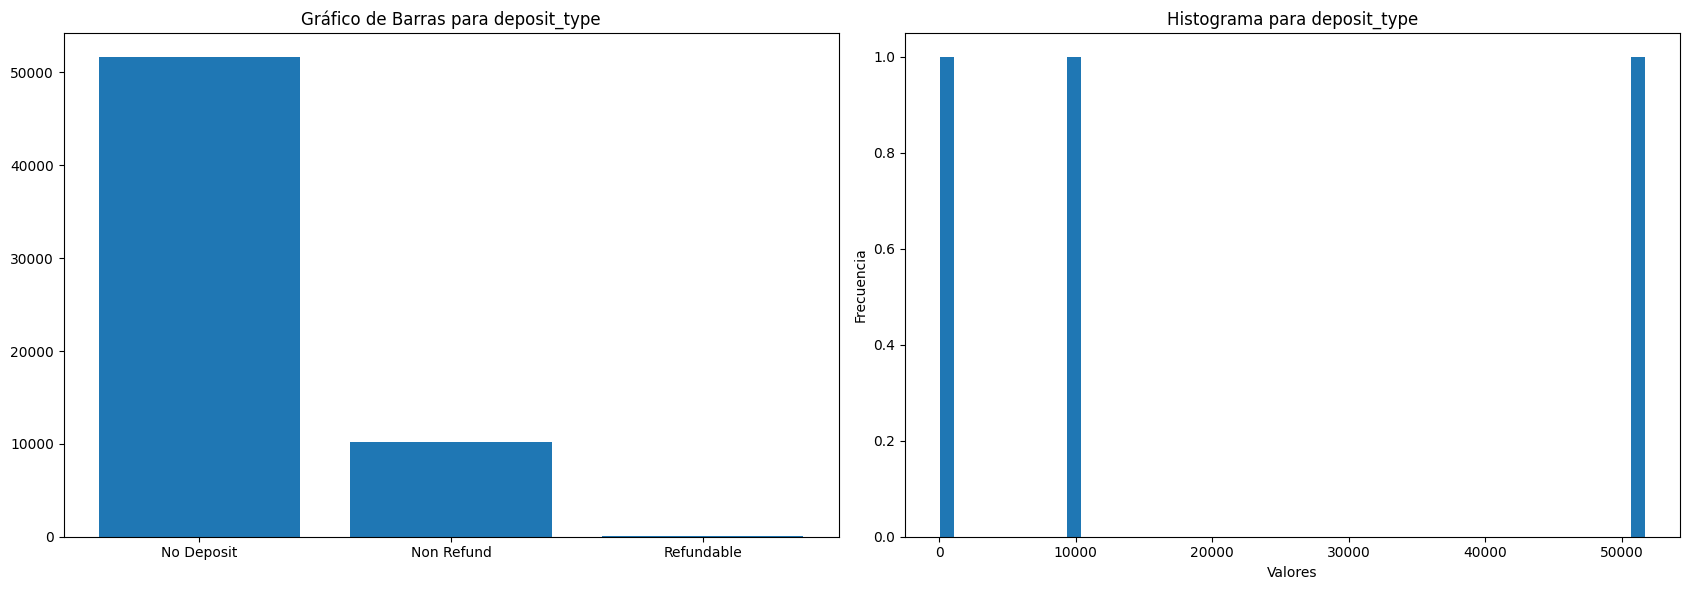

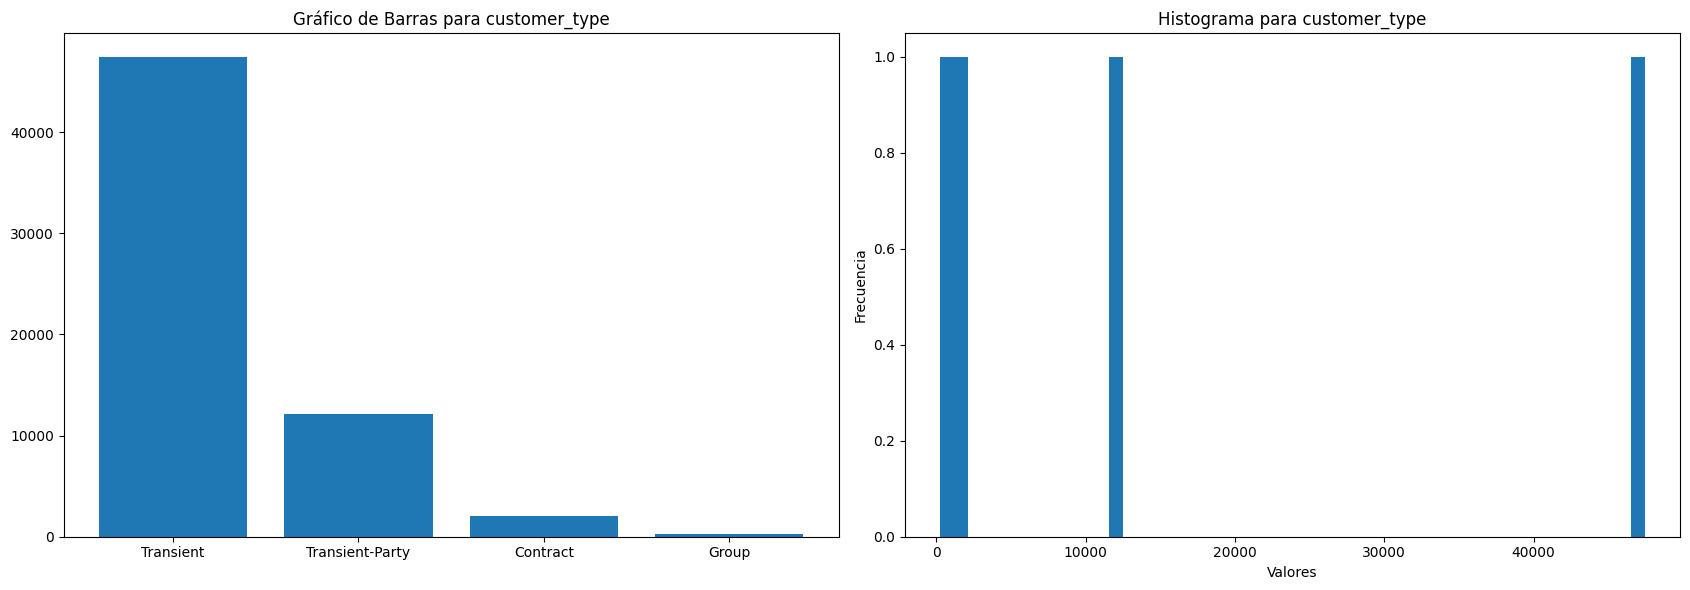

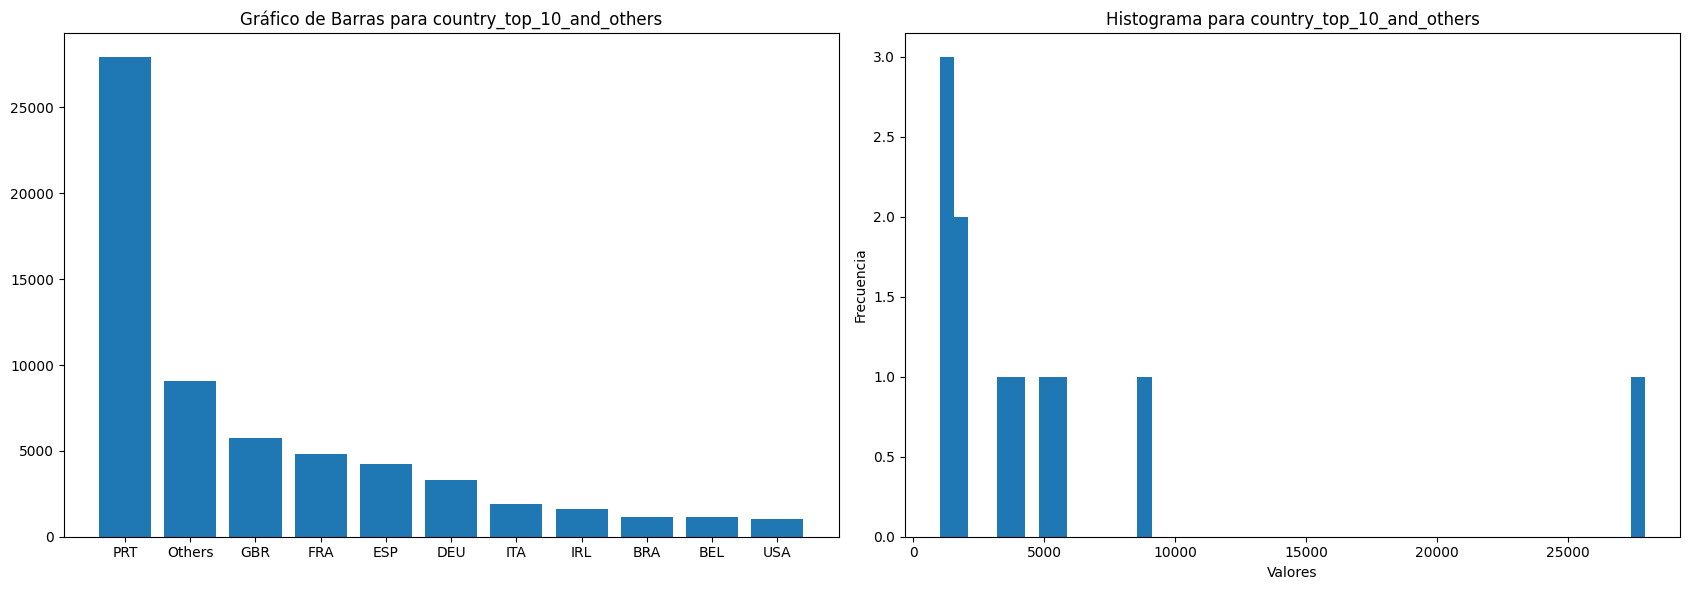

In [ ]:
NROWS = 1
NCOLS = 2
for columna in ds_variables_categoricas.columns:
    fig, axs = plt.subplots(
    figsize=(17, 6), nrows=NROWS, ncols=NCOLS
    )
    fig.subplots_adjust(hspace=0.3)
    axs[0].bar(ds_variables_categoricas[columna].value_counts().index,ds_variables_categoricas[columna].value_counts().values)
    axs[0].set_title(f'Gráfico de Barras para {columna}')

    axs[1].hist(ds_variables_categoricas[columna].value_counts(), bins = 50)
    axs[1].set_title(f'Histograma para {columna}')
    axs[1].set_xlabel('Valores')
    axs[1].set_ylabel('Frecuencia')

    plt.tight_layout()
    plt.show()

## Visualizacion variables numericas
Agrupamos las variables numericas en grupos que tengan algun tipo de relacion en base a los datos que alberga, ejemplo informacion de reserva, informacion de huespedes etc

In [ ]:
ds_variables_numericas = dsHotelCopy[dsHotelCopy.columns.difference(ds_variables_categoricas.columns)]
info_reserva = ds_variables_numericas[['arrival_date_day_of_month', 'arrival_date_week_number', 'arrival_date_year', 'booking_changes', 'days_in_waiting_list', 'lead_time', 'arrival_date_month']]
info_huespedes = ds_variables_numericas[['adults', 'babies', 'children']]
historial_reservas_y_solicitudes = ds_variables_numericas[['previous_bookings_not_canceled', 'previous_cancellations','total_of_special_requests', 'required_car_parking_spaces']]
estadias_hotel = ds_variables_numericas[['stays_in_week_nights', 'stays_in_weekend_nights']]
ds_variables_numericas.shape

(61913, 24)

### Visulizacion pairplot del grupo Informacion de reserva (en la diagonal se grafica un histograma de la variable y en los demas lugares un grafico del tipo scatter entre la combinacion de variables)

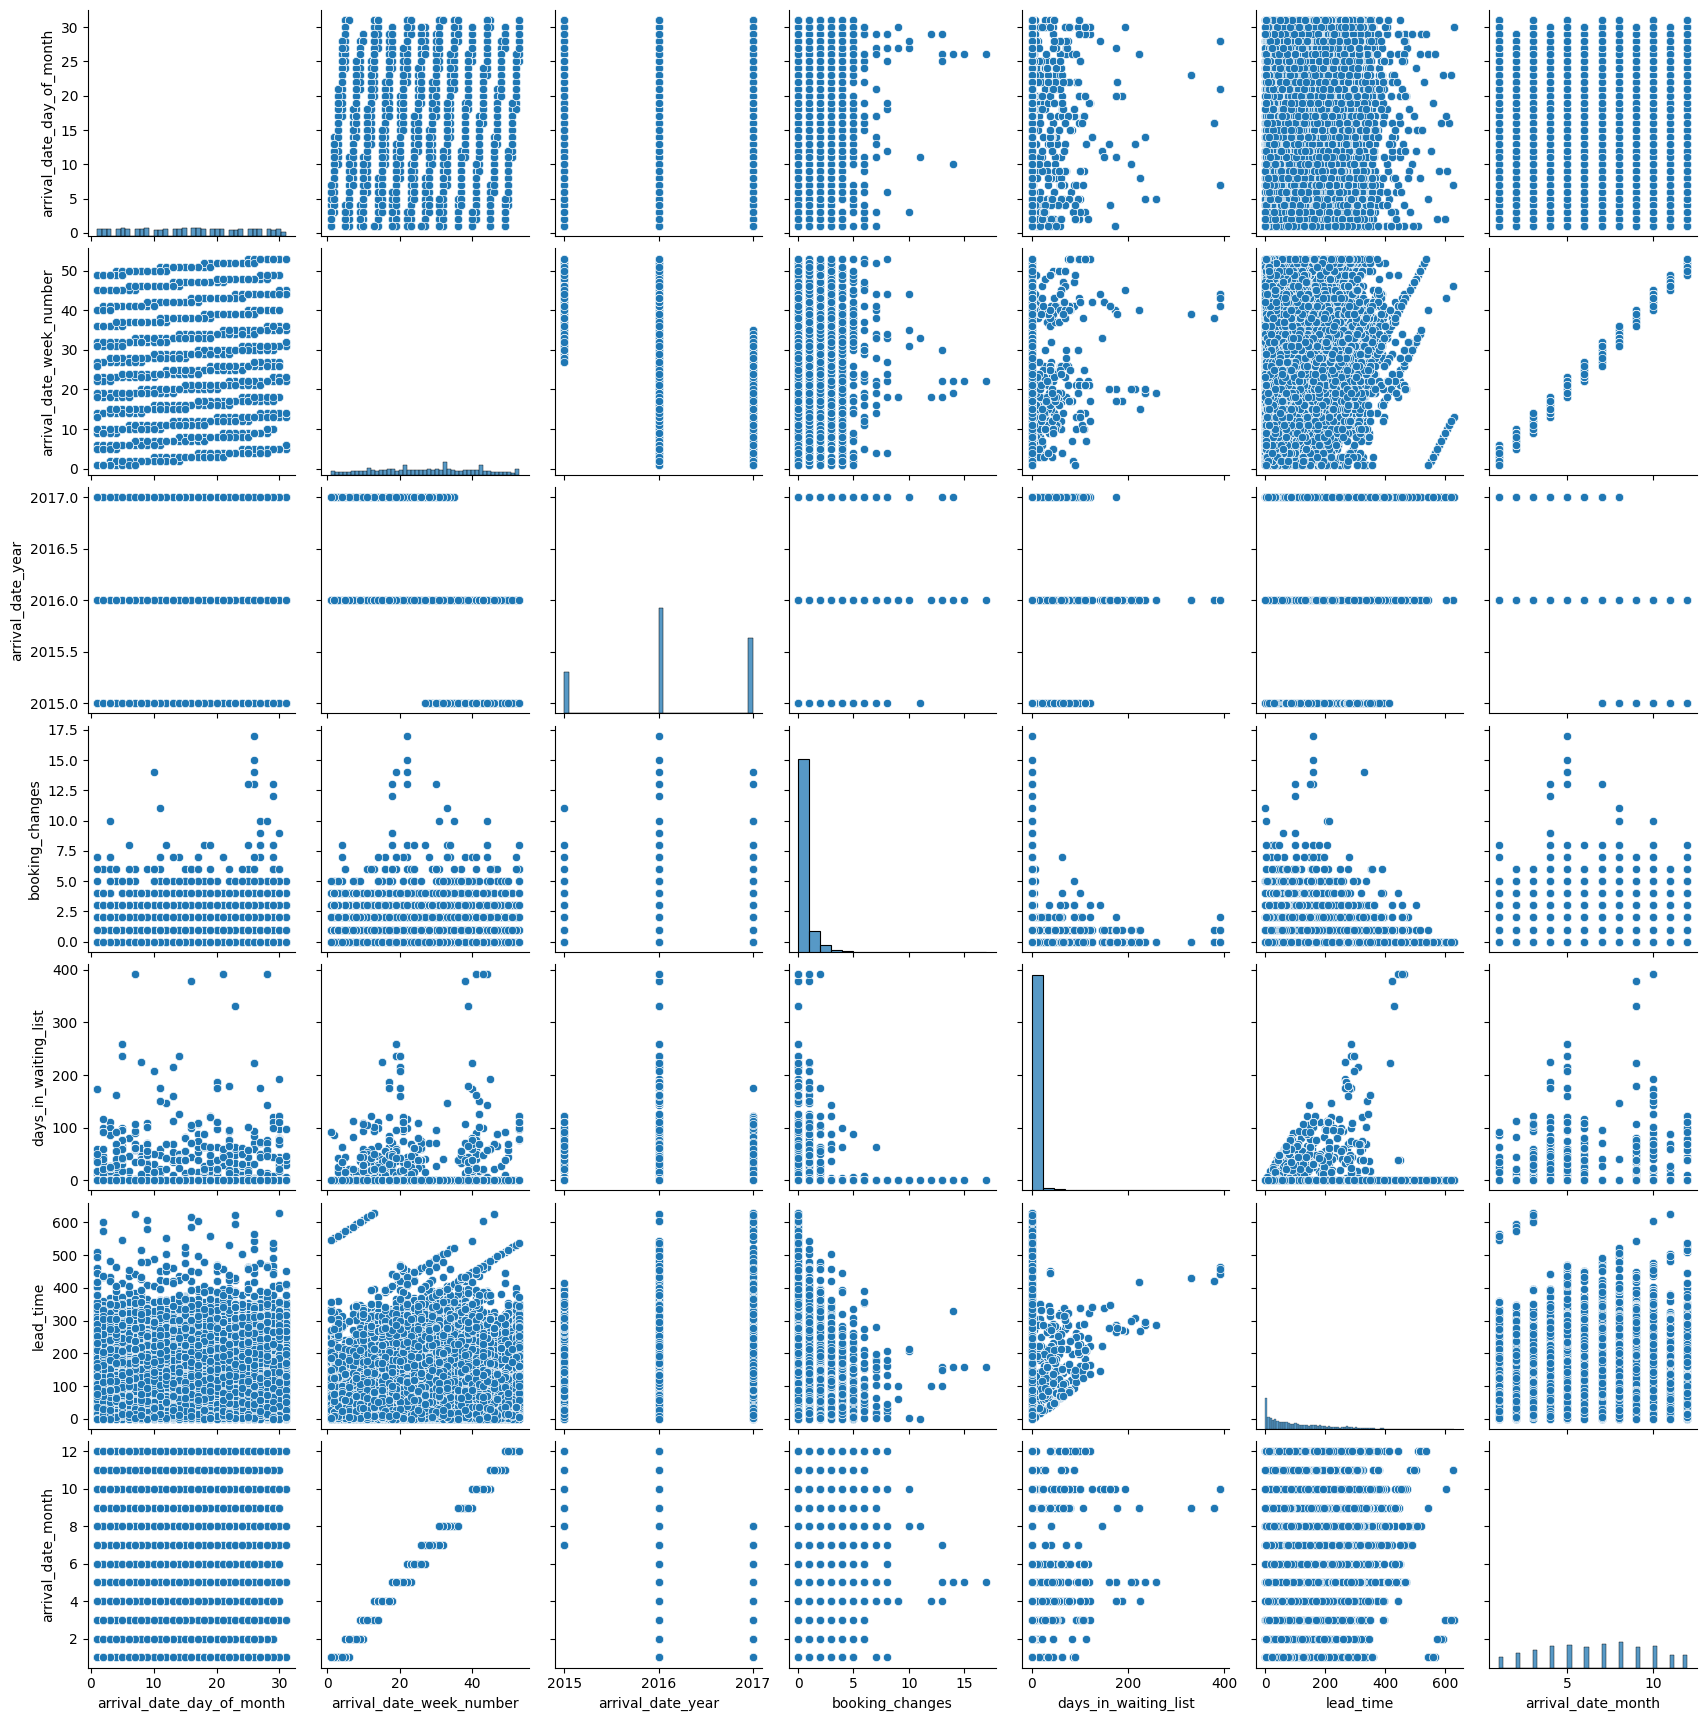

In [ ]:
sns.pairplot(info_reserva)

### Visulizacion pairplot del grupo Informacion de huespedes (en la diagonal se grafica un histograma de la variable y en los demas lugares un grafico del tipo scatter entre la combinacion de variables)

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:499: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(edges, name="edges"),
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:500: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pd.Index(widths, name="widths"),


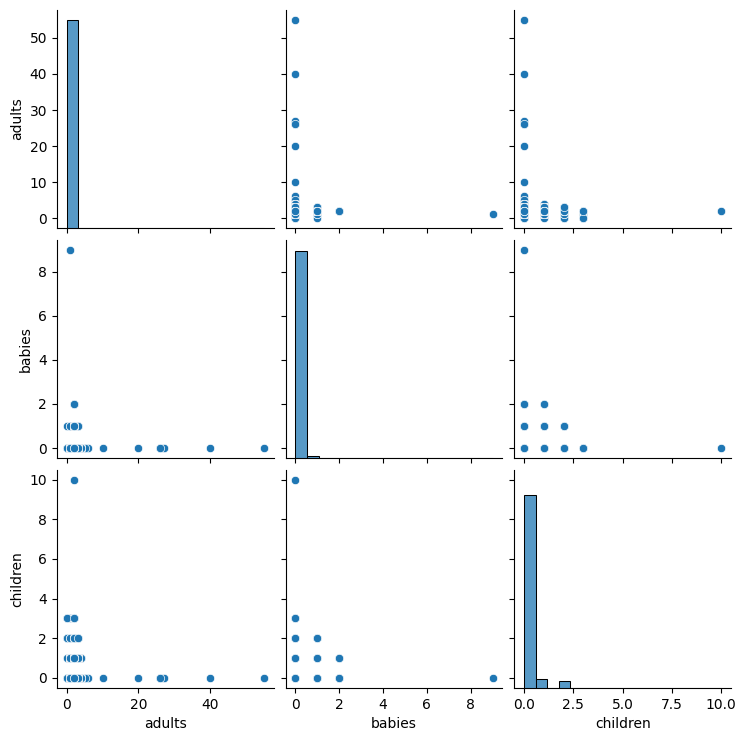

In [ ]:
sns.pairplot(info_huespedes)

### Visulizacion pairplot del grupo Historial de reservas y solicitudes (en la diagonal se grafica un histograma de la variable y en los demas lugares un grafico del tipo scatter entre la combinacion de variables)

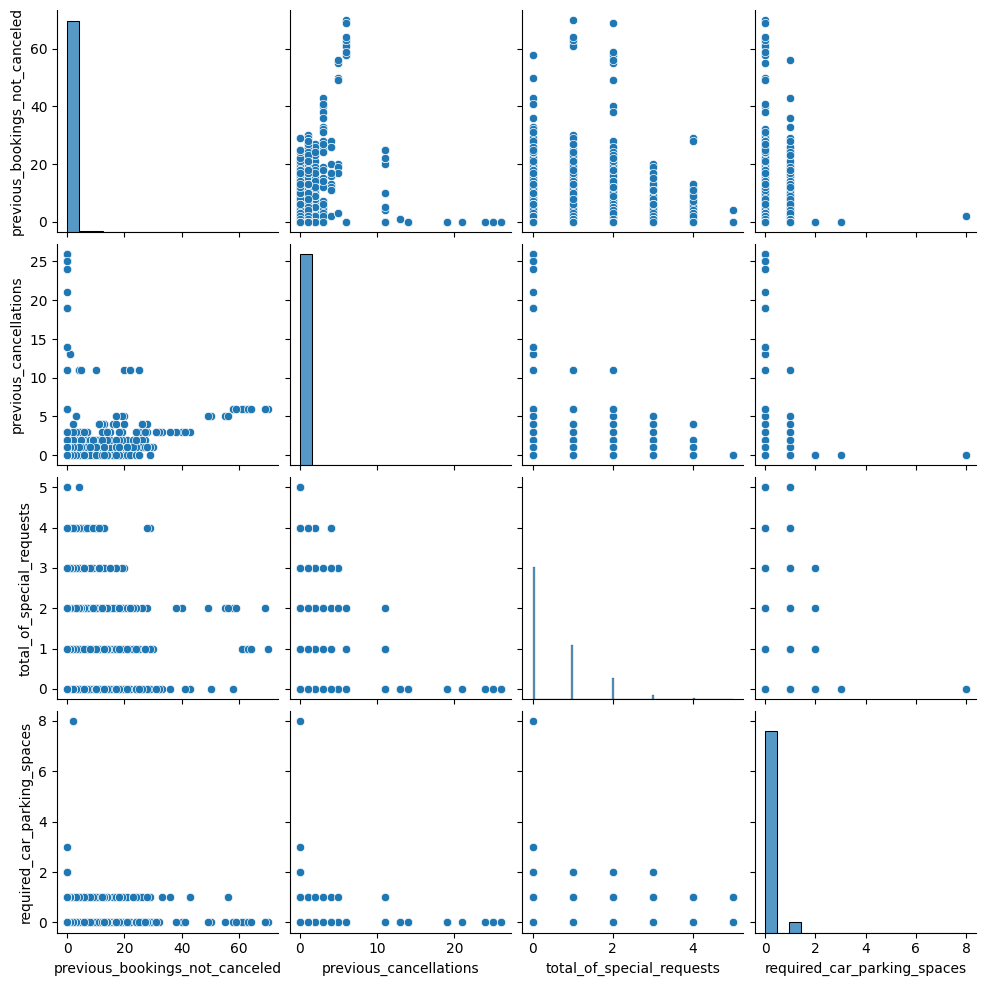

In [ ]:
sns.pairplot(historial_reservas_y_solicitudes)

### Visulizacion pairplot del grupo Estadias hotel (en la diagonal se grafica un histograma de la variable y en los demas lugares un grafico del tipo scatter entre la combinacion de variables)

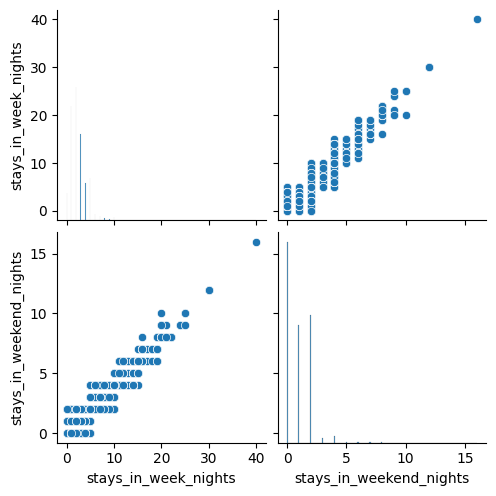

In [ ]:
sns.pairplot(estadias_hotel)

# Chequeo de variables despreciables y muestras de datos incompletas.
Se chequea que:
1. No haya muestras duplicadas. Esto seria un error ya que no puede haber 2 muestras de mismo ID.
2. Se verifica (y elimina si corresponde) que no haya columnas con valores NULL excesivos.
3. Se toman medidas para corregir las columnas con bajo porcentaje de valores NULL.
4. No haya datos mal ingresados, ejemplo montos como el ADR que no sean negativos, reservas hechas sin adultos, entre otras

 ##### Graficos de barras pre-modificaciones

<Axes: title={'center': '% De datos faltantes por variable - (Pre-Modificaciones)'}, xlabel='Variable', ylabel='% de datos faltantes'>

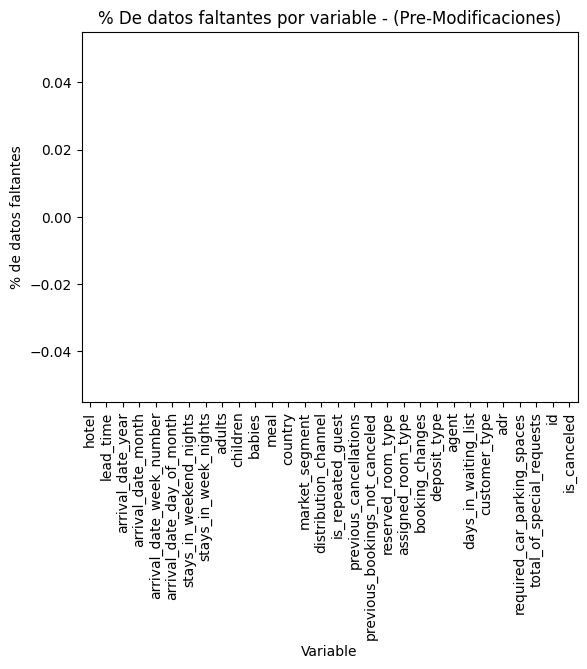

In [ ]:
filas_totales = dsHotelCopy.shape[0]                  #Se obtienen la cant. de filas del dataSet.
porcentajesFaltantes =dsHotelCopy.isna().sum() / filas_totales * 100
porcentajesFaltantes.plot.bar(alpha=0.5 , title="% De datos faltantes por variable - (Pre-Modificaciones)" , xlabel="Variable" , ylabel="% de datos faltantes")

In [ ]:
dsHotelCopy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53944 entries, 0 to 61912
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           53944 non-null  object 
 1   lead_time                       53944 non-null  int64  
 2   arrival_date_year               53944 non-null  int64  
 3   arrival_date_month              53944 non-null  object 
 4   arrival_date_week_number        53944 non-null  int64  
 5   arrival_date_day_of_month       53944 non-null  int64  
 6   stays_in_weekend_nights         53944 non-null  int64  
 7   stays_in_week_nights            53944 non-null  int64  
 8   adults                          53944 non-null  int64  
 9   children                        53944 non-null  float64
 10  babies                          53944 non-null  int64  
 11  meal                            53944 non-null  object 
 12  country                         53944

#### Valores faltantes o mal ingresados

##### Analisis de inconsistencia de los datos (valores mal ingresados)

Realizo la imputacion a la categoria adults que cumplan la condicion (que tengan babies pero no adults) y les asigno el valor mas probable, que seria la mediana de adults, de todas las filas que cumplen con la mediana de children y babies de esa primer condicion (que tengan babies pero no adults).
En nuestro caso solo habia una fila mal ingresada, en las cuales en 'children' valia 2 y en 'babies' 1 por ende la mediana de esos valores son ellos mismos, luego utilice esos valores para mapear "casos mas probables", es decir, filas con 2 en 'children' y 1 en 'babies', a todos esas filas les calcule las medianas de 'adults' y ese fue el valor con el que impute la fila mal ingresada

In [ ]:
condicion_adults_babies_mal_ingresados = (dsHotelCopy['adults'] <= 0) & (dsHotelCopy['babies'] > 0)
mediana_children = dsHotelCopy.loc[condicion_adults_babies_mal_ingresados, 'children'].median()
mediana_babies = dsHotelCopy.loc[condicion_adults_babies_mal_ingresados, 'babies'].median()
print(mediana_children)
print(mediana_babies)

2.0
1.0


In [ ]:
condicion_valor_mas_probable_para_adults =  (dsHotelCopy['children'] == mediana_children) & (dsHotelCopy['babies'] == mediana_babies)
mediana_adults = dsHotelCopy.loc[condicion_valor_mas_probable_para_adults, 'adults'].median()
dsHotelCopy.loc[condicion_adults_babies_mal_ingresados, 'adults'] = mediana_adults
print(mediana_adults)

2.0


##### Analisis de la variable 'agent'

In [ ]:
filas_con_faltantes = dsHotelCopy[dsHotelCopy['agent'].isna()]
print("Porcentaje de valores faltantes: " ,dsHotelCopy['agent'].isna().mean() * 100)
print(filas_con_faltantes['is_canceled'].value_counts())


Porcentaje de valores faltantes:  12.74368872450051
0    5084
1    2806
Name: is_canceled, dtype: int64


In [ ]:
len(dsHotelCopy[(dsHotelCopy['agent'].isna()) & (dsHotelCopy['is_canceled'] == 1)])
valores_nulos_totales = len(dsHotelCopy[(dsHotelCopy['agent'].isna()) & (dsHotelCopy['is_canceled'] == 1)]) + len(dsHotelCopy[(dsHotelCopy['agent'].isna()) & (dsHotelCopy['is_canceled'] == 0)])
resultado = (len(dsHotelCopy[(dsHotelCopy['agent'].isna()) & (dsHotelCopy['is_canceled'] == 0)]) / valores_nulos_totales) * 100
print("Porcentarje de reservas NO canceladas de los datos nulos:", resultado )

Porcentarje de reservas NO canceladas de los datos nulos: 64.43599493029151


##### Decidimos imputar los datos que aparecen como nulos con un valor que represente que dicha reserva no se hizo con ningun agent, dado que agent es un numero, pero representa una categoria(un ID), le pondremos el valor -1, este valor representa como dijimos anteriormente que dicha reserva no se hizo bajo ningun agent

In [ ]:
dsHotelCopy['agent'].fillna(-1, inplace=True)

C:\Users\UNITEC\AppData\Local\Temp\ipykernel_11428\1395042645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsHotelCopy['agent'].fillna(-1, inplace=True)


In [ ]:
dsHotelCopy['agent'].isnull().sum()

0

##### Analisis de la variable 'company'

In [ ]:
columnasInusables = ['company']                                     #Se decide eliminar la columna Company debido a una cantidad enorme de valores no utilizables.
dsHotelCopy.drop(columnasInusables, axis='columns', inplace = True) #Se elimina la columna "company"
dsHotelCopy = dsHotelCopy.dropna()                                  #Se eliminan las filas que tengan valores null o faltantes

KeyError: "['company'] not found in axis"

##### Graficos de barras post-modificaciones

In [ ]:
porcentajesFaltantes = dsHotelCopy.isna().sum() / filas_totales * 100              #Se printean los porcentajes de valores NULL de cada columna luego de los cambios.
porcentajesFaltantes.plot.bar(alpha=0.5 , title="% De datos faltantes por variable - (Post-Modificaciones)" , xlabel="Variable" , ylabel="% de datos faltantes")

NameError: name 'filas_totales' is not defined

##### Analisis de valores duplicados o informacion duplicada

Como vimos en las visualizaciones de variables numericas podemos observar, por ejemplo, que la variable arrival_date_week_number representa la misma informacion que arrival_date_month solo que en otra unidad de medida (una esta representada en meses y la otra en semanas) por ende decidimos quedarnos solo con arrival_date_month que nos parecio mas representativa ya que podemos crear por ejemplo nuevos campos y ademas es mas abarcativa

In [ ]:
dsHotelCopy = dsHotelCopy.drop('arrival_date_week_number', axis=1)

In [ ]:
#Eliminamos de la lista de variables cuantitativas
variablesCuantitativas.remove("arrival_date_week_number")

In [ ]:
#Se chequea que no haya valores duplicados, lo que querria decir que hay dos o mas muestras con mismo ID, que seria un error.
duplicados = dsHotelCopy[dsHotelCopy.duplicated(keep = False)]
duplicados

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,high_season_month


# Analisis de la existencia de valores atípicos



In [ ]:
dsHotelCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61688 entries, 0 to 61912
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           61688 non-null  object 
 1   lead_time                       61688 non-null  int64  
 2   arrival_date_year               61688 non-null  int64  
 3   arrival_date_month              61688 non-null  int64  
 4   arrival_date_day_of_month       61688 non-null  int64  
 5   stays_in_weekend_nights         61688 non-null  int64  
 6   stays_in_week_nights            61688 non-null  int64  
 7   adults                          61688 non-null  int64  
 8   children                        61688 non-null  Int64  
 9   babies                          61688 non-null  int64  
 10  meal                            61688 non-null  object 
 11  country                         61688 non-null  object 
 12  market_segment                  

In [ ]:
ds_variables_cuantitativas = dsHotelCopy[variablesCuantitativas]

Buscamos valores atipicos en forma univariad mediante IQR y Box-Plot

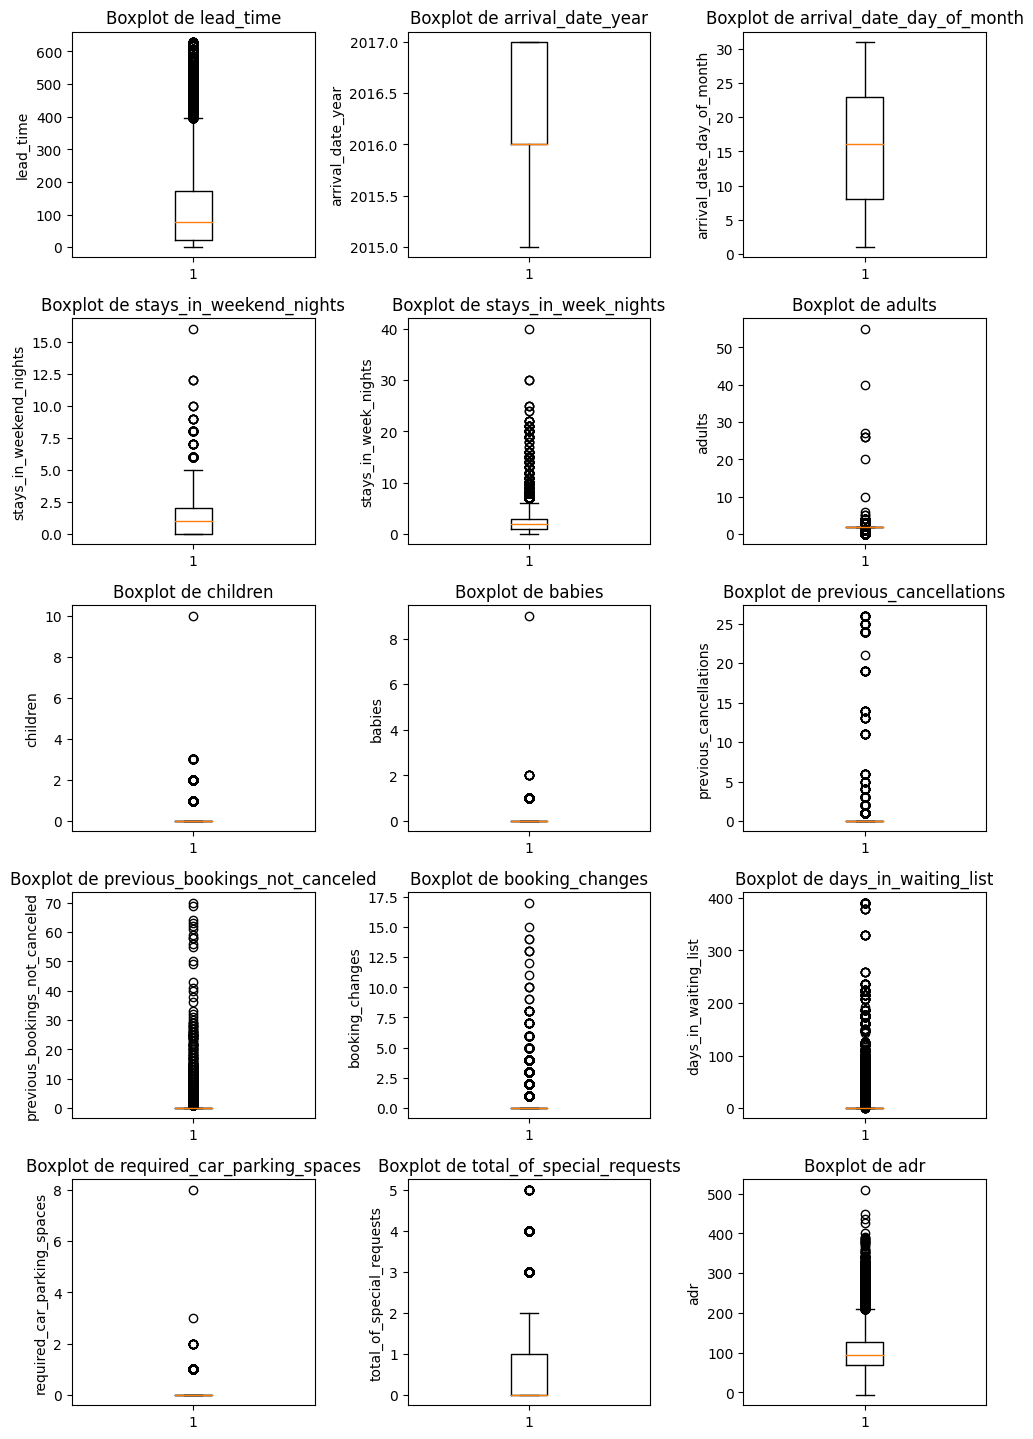

In [ ]:
filas = 7
num_columnas = len(ds_variables_cuantitativas.columns)
columnas = (num_columnas + filas - 1) // filas

fig, axes = plt.subplots(filas, columnas, figsize=(10, 20))
fig.subplots_adjust(wspace=0.5)

for i, var in enumerate(ds_variables_cuantitativas.columns):
    fil = i // columnas
    col = i % columnas
    ax = axes[fil, col]
    ax.boxplot(ds_variables_cuantitativas[var],showfliers=True)
    ax.set_title(f'Boxplot de {var}')
    ax.set_ylabel(f'{var}')

# elimino graficos vacios
for i in range(num_columnas, filas * columnas):
    fig.delaxes(axes[i // columnas, i % columnas])

plt.tight_layout()
plt.show()

Obtenemos valores estadisticos de las variables a analizar para tener una mejor comprension de los graficos

In [ ]:
# seteamos umbral "severo"
iqr_umbral = 3
ds_estadisticas = pd.DataFrame()
q1 = ds_variables_cuantitativas.quantile([.25]).iloc[0]
q3 = ds_variables_cuantitativas.quantile([.75]).iloc[0]
iqr = q3 -q1

ds_estadisticas["mediana"] = ds_variables_cuantitativas.median()
ds_estadisticas["media"] = ds_variables_cuantitativas.mean()
ds_estadisticas["q1"] = q1
ds_estadisticas["q3"] = q3
ds_estadisticas['minimo']=ds_variables_cuantitativas.min()
ds_estadisticas['maximo']=ds_variables_cuantitativas.max()
ds_estadisticas['outlier_inferior'] = q1 - iqr * iqr_umbral
ds_estadisticas['outlier_superior'] = q3 + iqr * iqr_umbral

ds_estadisticas

,mediana,media,q1,q3,minimo,maximo,outlier_inferior,outlier_superior
lead_time,78.0,112.510245,23.0,172.0,0.00,629.0,-424.0,619.0
arrival_date_year,2016.0,2016.155865,2016.0,2017.0,2015.00,2017.0,2013.0,2020.0
arrival_date_day_of_month,16.0,15.789392,8.0,23.0,1.00,31.0,-37.0,68.0
stays_in_weekend_nights,1.0,0.925399,0.0,2.0,0.00,16.0,-6.0,8.0
stays_in_week_nights,2.0,2.511428,1.0,3.0,0.00,40.0,-5.0,9.0
adults,2.0,1.864382,2.0,2.0,0.00,55.0,2.0,2.0
children,0.0,0.105239,0.0,0.0,0.00,10.0,0.0,0.0
babies,0.0,0.007181,0.0,0.0,0.00,9.0,0.0,0.0
previous_cancellations,0.0,0.114820,0.0,0.0,0.00,26.0,0.0,0.0
previous_bookings_not_canceled,0.0,0.111561,0.0,0.0,0.00,70.0,0.0,0.0


Lead Time

Representa la cantidad de dias entre la fecha en que se hizo la reserva y el dia en el que llega al hotel. En el Box-Plot vemos outliers para mayor a 600 dias, calculamos el porcentaje que representa del total de observaciones.


In [ ]:
def imprimir_porcentaje_obs(es_outlier,condicion, ds):
  print (f'se encontraron {len(es_outlier)} casos de {condicion} representan {len(es_outlier)/len(ds) *100}% del total de observaciones')

In [ ]:
es_outlier = dsHotelCopy[(dsHotelCopy['lead_time'] >600) ]
imprimir_porcentaje_obs(es_outlier,'lead_time >600',dsHotelCopy)

se encontraron 102 casos de lead_time >600 representan 0.165348203864609% del total de observaciones


creemos que las personas que hacen reservas con mucho tiempo de antelacion, hay mas probabilidad de que las terminen cancelando (poco compromiso, surge alguna situacion imprevista, etc)

Calculamos la relacion de este conjunto outlier con el target

In [ ]:
canceladas = es_outlier[(es_outlier['is_canceled'] == 1)]
imprimir_porcentaje_obs(canceladas,'is_canceled = 1',es_outlier['is_canceled'])

se encontraron 102 casos de is_canceled = 1 representan 100.0% del total de observaciones


Considerando la alta relacion con el target = 1, y lo anteriormente dicho, decidimos estas observaciones

**arrival_date_year, arrival_date_week_number, arrival_date_day_of_month**

*   No se observan valores atipicos en ninguno de sus graficos


**stays_in_weekend_nights**, **stays_in_week_nights**


*  weekend_nights representa la cantidad de semanas en el hotel obtuvimos como outlier superior mayor a 9

*  week_nights, representa la cantidad de semanas (de lunes a viernes) en el hotel  obtuvimos como outlier superior mayor a 8



*   vemos el procentaje que representan















In [ ]:
es_outlier_0 = dsHotelCopy[(dsHotelCopy['stays_in_week_nights'] >9) ]
imprimir_porcentaje_obs(es_outlier_0,'stays_in_week_nights >9',dsHotelCopy )

es_outlier_1 = dsHotelCopy[(dsHotelCopy['stays_in_weekend_nights'] > 8) ]
imprimir_porcentaje_obs(es_outlier_1,'stays_in_week_nights > 8',dsHotelCopy )

se encontraron 725 casos de stays_in_week_nights >9 representan 1.1752690960964856% del total de observaciones
se encontraron 13 casos de stays_in_week_nights > 8 representan 0.021073790688626637% del total de observaciones


son relativamente muchas observaciones, optamos por no descartar ninguna

ADR

representa el promodio de renta diaria (positivo)






Text(0.5, 1.0, 'Distribucion de ADR')

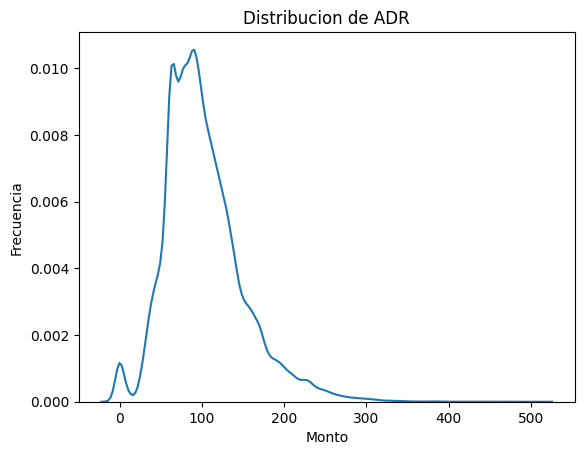

In [ ]:
sns.kdeplot(data = dsHotelCopy.adr)
plt.xlabel(xlabel = 'Monto')
plt.ylabel(ylabel = 'Frecuencia')
plt.title('Distribucion de ADR')

Del grafico de distribucion y el minimo obtenido, vemos que son outliers los montos menores a 0 y mayores a 300, vemos el porcentaje que representan del total de obsevaciones

In [ ]:
es_outlier_0 = dsHotelCopy[(dsHotelCopy['adr'] <=0) ]
es_outlier_1 = dsHotelCopy[(dsHotelCopy['adr'] >300) ]
imprimir_porcentaje_obs(es_outlier_0,'adr <=0',dsHotelCopy )
imprimir_porcentaje_obs(es_outlier_1,'adr >300',dsHotelCopy )

se encontraron 876 casos de adr <=0 representan 1.420049280248995% del total de observaciones
se encontraron 144 casos de adr >300 representan 0.23343275839709507% del total de observaciones


Vemos pocos casos, tomamos la decision de eliminarlos para evitar que generen ruido en el modelo

In [ ]:
# se eliminan las observaciones
dsHotelCopy.drop(es_outlier_0.index,inplace=True)
dsHotelCopy.reset_index(drop=True)
dsHotelCopy.drop(es_outlier_1.index, inplace = True)
dsHotelCopy.reset_index(drop=True)
print()

**previous_cancelations, previous_bookings_not_canceled, booking_changes**

* Tenemos que sus outliers superiores son >0, calculamos el procentaje que representan



In [ ]:
es_outlier_0 = dsHotelCopy[(dsHotelCopy['previous_cancellations'] >0) ]
imprimir_porcentaje_obs(es_outlier_0,'previous_cancellations >0',dsHotelCopy )

es_outlier_1 = dsHotelCopy[(dsHotelCopy['previous_bookings_not_canceled'] >0) ]
imprimir_porcentaje_obs(es_outlier_1,'previous_bookings_not_canceled >0',dsHotelCopy )

es_outlier_2 = dsHotelCopy[(dsHotelCopy['booking_changes'] >0) ]
imprimir_porcentaje_obs(es_outlier_2,'booking_changes >0',dsHotelCopy )

se encontraron 4320 casos de previous_cancellations >0 representan 7.120722621480846% del total de observaciones
se encontraron 1310 casos de previous_bookings_not_canceled >0 representan 2.159293202347201% del total de observaciones
se encontraron 8020 casos de booking_changes >0 representan 13.21948968154546% del total de observaciones


No podemos descartar ninguna obsevacion de previous_cancellations y booking_changes puesto que representan un gran porcentaje de datos.


Creemos que a mayor cantidad de 'previous_bookings_not_canceled' es mas probable que la persona no cancele la reserva

In [ ]:
es_outlier_1.is_canceled.value_counts()

0    1202
1     108
Name: is_canceled, dtype: int64

Decidimos conservar estas observaciones

**days_in_the_waiting_list**

* Representa la cantidad de dias en la lista de espera, vemos del Box-plot outliers para valores mayores a 0 dias, calculamos el porcentaje de datos que representa



In [ ]:
es_outlier = dsHotelCopy[(dsHotelCopy['days_in_waiting_list'] >0) ]
imprimir_porcentaje_obs(es_outlier,'days_in_waiting_list >0',dsHotelCopy)

se encontraron 2219 casos de days_in_waiting_list >0 representan 3.6576119206171294% del total de observaciones


 tenemos un considerable porcentaje de datos, los conservamos

required_car_parking_spaces


*   Representa la cantidad de espacios de estacionamiento pedido
*   Del Bot-Plox y valores estadisticos vemos que la gran mayoria de las observaciones tiene como valor 0, vemos que porcentaje representan los outlier >0



In [ ]:
es_outlier = dsHotelCopy[(dsHotelCopy['required_car_parking_spaces'] >0) ]
imprimir_porcentaje_obs(es_outlier,'required_car_parking_spaces >0', dsHotelCopy)

se encontraron 2961 casos de required_car_parking_spaces >0 representan 4.88066196347333% del total de observaciones


obtuvimos un porcentaje considerable de observaciones, decidimos conservarlas

total_of_special_requests

*   Representa la cantidad de pedidos especiales relizados
*   Podemos ver en los valores estadicos y en el box-plot outliers para valores mayores a 2, vemos el poncetaje que representan



In [ ]:
es_outlier = dsHotelCopy[(dsHotelCopy['total_of_special_requests']>2) ]
imprimir_porcentaje_obs(es_outlier,'total_of_special_requests >2 =', dsHotelCopy)

se encontraron 1307 casos de total_of_special_requests >2 = representan 2.154348256082284% del total de observaciones


vemos que representan una considerable cantidad de observaciones, decidimos conservarlas

Adults

* Representa la cantidad de Adultos, del Bot-Plox vemos outliers superiores para valores mayores a 2 y vemos el porcentaje que representan



In [ ]:
es_outlier = dsHotelCopy[(dsHotelCopy['adults'] >2) ]
imprimir_porcentaje_obs(es_outlier,'adults >2', dsHotelCopy)

se encontraron 3135 casos de adults >2 representan 5.167468846838531% del total de observaciones


vemos que con este umbral representan una gran cantidad de casos, pero vemos que la variable puede tomar un valor maximo de 55, hacemos un grafico de su distribucion

Text(0, 0.5, 'Frecuencia')

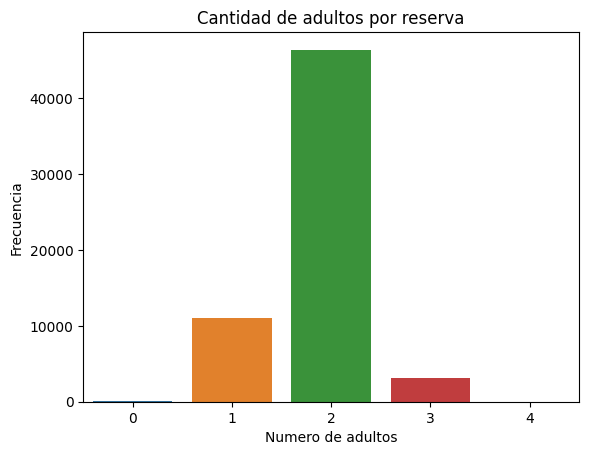

In [ ]:
sns.countplot(data = dsHotelCopy, x = 'adults')
plt.title('Cantidad de adultos por reserva')
plt.xlabel('Numero de adultos')
plt.ylabel('Frecuencia')

ajustamos el nuevo umbral a mayores que 3 y vemos el porcentaje que representa

In [ ]:
es_outlier = dsHotelCopy[(dsHotelCopy['adults'] >3) ]
imprimir_porcentaje_obs(es_outlier,'adults >3', dsHotelCopy)

se encontraron 28 casos de adults >3 representan 0.04615283180589438% del total de observaciones


Vemos que representan un numero muy bajo de observaciones, procedemos a eliminarlas

In [ ]:
#procedemos a eliminar
dsHotelCopy.drop(es_outlier.index, inplace = True)
dsHotelCopy.reset_index(drop=True)
print()

**Children**
*   Representa la cantidad de niños registrados en la reserva.
*   De los valores estadisticos vemos que tiene un minimo de 0 y maximo de 10, hacemos un grafico de distribucion


Text(0.5, 1.0, 'cantidad de niños por reserva')

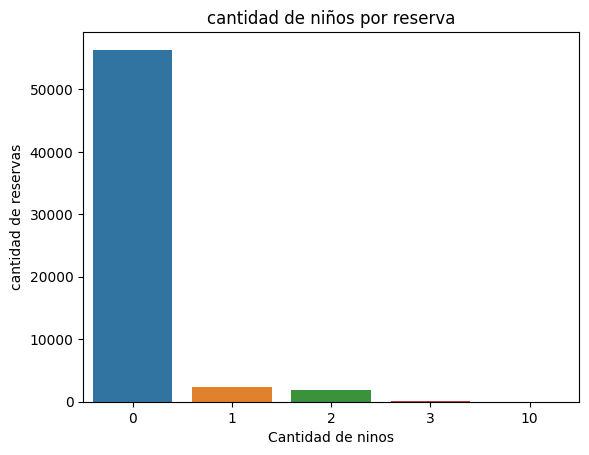

In [ ]:
eje_y = dsHotelCopy["children"].value_counts()
eje_x = eje_y.index.tolist()
sns.barplot(y = eje_y, x = eje_x,)
plt.xlabel('Cantidad de ninos')
plt.ylabel(ylabel='cantidad de reservas')
plt.title('cantidad de niños por reserva')

filtramos como outlier los valores mayores a 2

In [ ]:
es_outlier = dsHotelCopy[(dsHotelCopy['children'] >2) ]
imprimir_porcentaje_obs(es_outlier,'children >2', dsHotelCopy)

se encontraron 38 casos de children >2 representan 0.06266490765171505% del total de observaciones


In [ ]:
#procedemos a eliminar
dsHotelCopy.drop(es_outlier.index, inplace = True)
dsHotelCopy.reset_index(drop=True)
print()

Babies

*   Representa la cantidad de bebes registrados en la reserva, de los valores estadisticos vemos un minimo de 0 y maximo de 9, del box-plot vemos outlier para valores mayores que 1, vemos el porcentaje que representan



In [ ]:
es_outlier = dsHotelCopy[(dsHotelCopy['babies'] >1) ]
imprimir_porcentaje_obs(es_outlier,'babies >1', dsHotelCopy)

se encontraron 8 casos de babies >1 representan 0.013200884459258771% del total de observaciones


In [ ]:
#procedemos a eliminar
dsHotelCopy.drop(es_outlier.index, inplace = True)
dsHotelCopy.reset_index(drop=True)
print()

In [ ]:
dsHotelCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60594 entries, 0 to 61912
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           60594 non-null  object 
 1   lead_time                       60594 non-null  int64  
 2   arrival_date_year               60594 non-null  int64  
 3   arrival_date_month              60594 non-null  int64  
 4   arrival_date_day_of_month       60594 non-null  int64  
 5   stays_in_weekend_nights         60594 non-null  int64  
 6   stays_in_week_nights            60594 non-null  int64  
 7   adults                          60594 non-null  int64  
 8   children                        60594 non-null  Int64  
 9   babies                          60594 non-null  int64  
 10  meal                            60594 non-null  object 
 11  country                         60594 non-null  object 
 12  market_segment                  

buscamos valores atipicos en forma multivariada
- info huespedes ['adults','children','babies'], isolation forest

In [ ]:
def calculate_mahalanobis_distance(dataset):
    X = dataset.copy()
    sample_X = X.sample(frac=0.1)

    mu = sample_X.mean()
    X_diff = X - mu
    X_diff = X_diff.values.T

    cov = np.cov(sample_X.values.T)
    inv_cov = np.linalg.inv(cov)
    W = sc.linalg.sqrtm(inv_cov)

    Wx = np.matmul(W, X_diff)
    X['mahalanobis'] = [np.dot(Wx[:, i], Wx[:, i]) for i in range(Wx.shape[1])]
    return X

In [ ]:
#Creo el modelo
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(n_estimators=100, max_samples='auto',
                          contamination=0.05, max_features=3,
                          bootstrap=False, n_jobs=-1, random_state=1)

#Entreno y genero la predicción
ds_adult_children_babies = dsHotelCopy[['adults','children','babies']]
pred= iforest.fit_predict(ds_adult_children_babies)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [ ]:
#Almaceno scores y etiquetas
ds_adult_children_babies['scores']=iforest.decision_function(ds_adult_children_babies)
ds_adult_children_babies['outlier_label']=pred

#Observaciones anómalas
ds_adult_children_babies[ds_adult_children_babies.outlier_label==-1]

<ipython-input-69-87a2acf8f64e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_adult_children_babies['scores']=iforest.decision_function(ds_adult_children_babies)
<ipython-input-69-87a2acf8f64e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_adult_children_babies['outlier_label']=pred


,adults,children,babies,scores,outlier_label
2,2,2,0,-0.048777,-1
71,2,2,0,-0.048777,-1
96,0,2,0,-0.170204,-1
111,2,2,0,-0.048777,-1
143,2,2,0,-0.048777,-1
...,...,...,...,...,...
61817,2,2,0,-0.048777,-1
61819,2,2,0,-0.048777,-1
61828,2,2,0,-0.048777,-1
61845,2,2,0,-0.048777,-1


In [ ]:
#Cantidad de obs. anómalas
ds_adult_children_babies.outlier_label.value_counts()

 1    57952
-1     2642
Name: outlier_label, dtype: int64

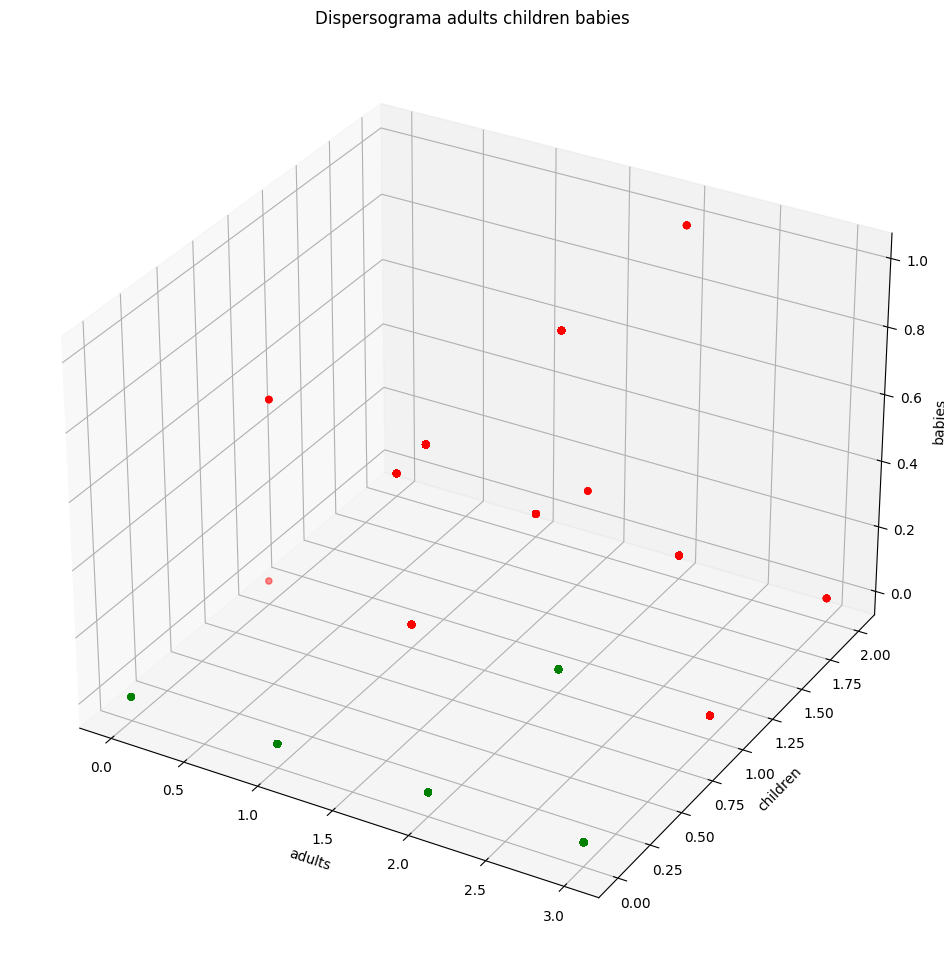

In [ ]:
#Grafico dispersograma
colors = ['red' if label == -1 else 'green' for label in ds_adult_children_babies['outlier_label']]
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(ds_adult_children_babies.adults,
           ds_adult_children_babies.children,
           ds_adult_children_babies.babies,c=colors)
ax.set_xlabel('adults')
ax.set_ylabel('children')
ax.set_zlabel('babies')
plt.title('Dispersograma adults children babies')
plt.show()

 consideramos 0 adults y children > 0 como valor atipico (la reserva quedaria solo con chicos), filtramos estos datos como outliers y los eliminamos
 En el caso de reservas que tengan solo a babies, no las consideramos como valor atipico sino como dato mal ingresado debido a que es un caso imposible.

In [ ]:
es_outlier = dsHotelCopy[((dsHotelCopy['adults'] == 0) & (dsHotelCopy['children']>0))]
imprimir_porcentaje_obs(es_outlier,'adults ==0 y children >0', dsHotelCopy)

se encontraron 113 casos de adults ==0 y children >0 representan 0.18648711093507608% del total de observaciones


In [ ]:
#procedemos a eliminar
dsHotelCopy.drop(es_outlier.index, inplace = True)
dsHotelCopy.reset_index(drop=True)
print()

Estadia


*   stays_in_week_nights
*   stays_in_weekend_nights




,stays_in_week_nights,stays_in_weekend_nights,mahalanobis
count,60481.000000,60481.000000,60481.000000
mean,2.528612,0.932574,1.954298
std,1.881443,0.993972,4.605960
min,0.000000,0.000000,0.064087
25%,1.000000,0.000000,0.919953
50%,2.000000,1.000000,1.209285
75%,3.000000,2.000000,2.030534
max,40.000000,16.000000,409.493141


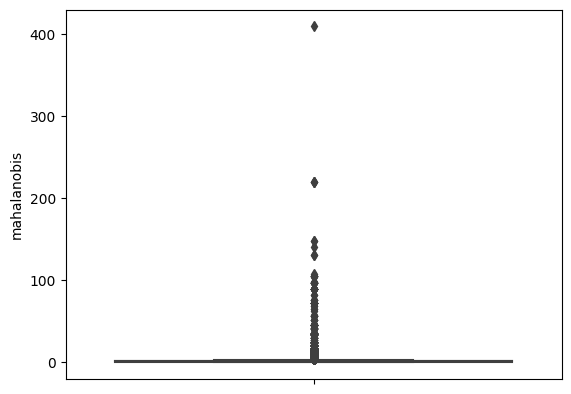

In [ ]:
ds_estadia = dsHotelCopy[['stays_in_week_nights', 'stays_in_weekend_nights']]
mahal = calculate_mahalanobis_distance(ds_estadia)
sns.boxplot(y = mahal.mahalanobis)
mahal.describe()

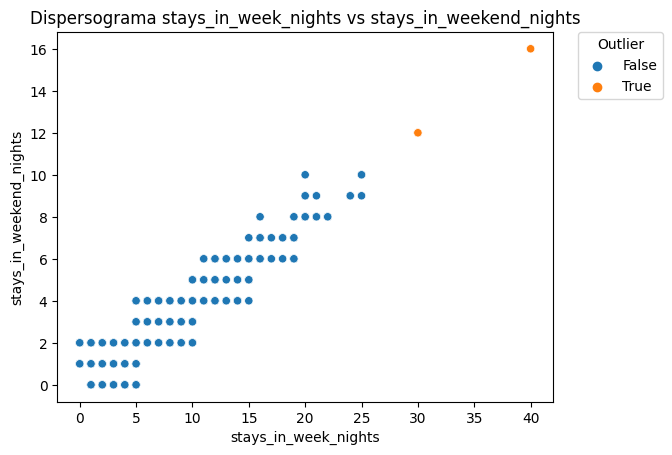

In [ ]:
es_outlier = (mahal['mahalanobis']>160)

sns.scatterplot(x=ds_estadia.stays_in_week_nights,
                y=ds_estadia.stays_in_weekend_nights,
                hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma stays_in_week_nights vs stays_in_weekend_nights' )
plt.show()

filtramos stays_in_week_night mayores a 30 y stays_in_wekeen_night >10

In [ ]:
es_outlier = dsHotelCopy[((dsHotelCopy['stays_in_week_nights'] >=30 ) & (dsHotelCopy['stays_in_weekend_nights']>10 ))]
imprimir_porcentaje_obs(es_outlier,'stays_in_week_nights >=30 y stays_in_wekeend_nights >10 ', dsHotelCopy)

se encontraron 4 casos de stays_in_week_nights >=30 y stays_in_wekeend_nights >10  representan 0.006613647261123327% del total de observaciones


Decidimos eliminar estos casos para evitar ruido en el modelo

In [ ]:
#los eliminamos
dsHotelCopy.drop(es_outlier.index, inplace = True)
dsHotelCopy.reset_index(drop=True)
print()

ADR y stays_in_week_night

,adr,stays_in_week_nights,mahalanobis
count,60477.000000,60477.000000,60477.000000
mean,103.396135,2.526630,2.051178
std,44.973715,1.865316,4.584126
min,0.500000,0.000000,0.065622
25%,71.600000,1.000000,0.467659
50%,95.000000,2.000000,0.938101
75%,126.000000,3.000000,2.134657
max,300.000000,25.000000,155.879089


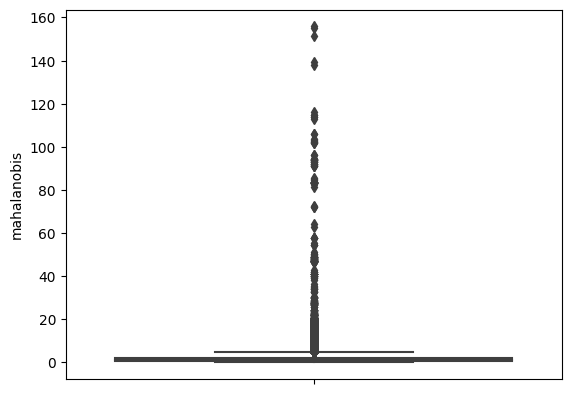

In [ ]:
ds_adr_week = dsHotelCopy[['adr', 'stays_in_week_nights']]
mahal = calculate_mahalanobis_distance(ds_adr_week)
sns.boxplot(y = mahal.mahalanobis)
mahal.describe()

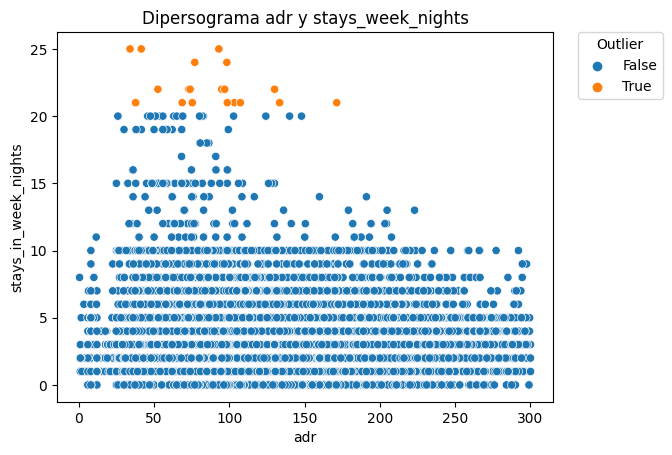

In [ ]:
es_outlier = (mahal['mahalanobis']>100)

sns.scatterplot(x=ds_adr_week.adr,
                y=ds_adr_week.stays_in_week_nights,
                hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dipersograma adr y stays_week_nights' )
plt.show()

Detectamos outliers para adr menores a 150 y stays_in_week_nights mayores a 21

In [ ]:
es_outlier = dsHotelCopy[((dsHotelCopy['stays_in_week_nights'] >21 ) & (dsHotelCopy['adr'] < 150 ))]
imprimir_porcentaje_obs(es_outlier,'stays_in_week_nights > 21 y adr <150 ', dsHotelCopy)

se encontraron 11 casos de stays_in_week_nights > 21 y adr <150  representan 0.01818873290672487% del total de observaciones


Tenemos muy pocos casos, y vemos que representan una situacion muy poco problable ( adr menos de 50 y mas de 20 semanas de hospedaje), decidimos eliminarlos

In [ ]:
#los eliminamos
dsHotelCopy.drop(es_outlier.index, inplace = True)
dsHotelCopy.reset_index(drop=True)
print()

days_in_waiting list y Stays_in_week_nights


,days_in_waiting_list,booking_changes,mahalanobis
count,60466.000000,60466.000000,60466.000000
mean,2.679853,0.191231,2.047900
std,18.775249,0.597353,16.735184
min,0.000000,0.000000,0.099527
25%,0.000000,0.000000,0.119139
50%,0.000000,0.000000,0.119139
75%,0.000000,0.000000,0.119139
max,391.000000,17.000000,704.199409


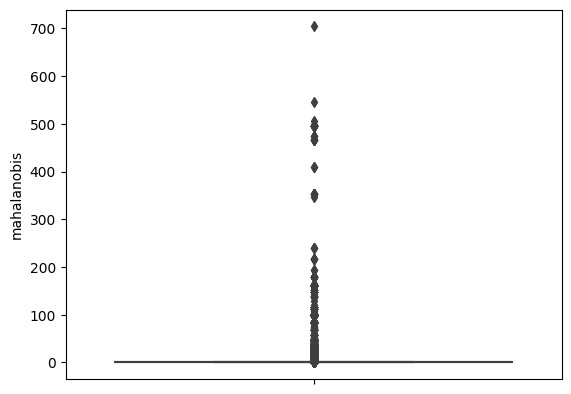

In [ ]:
ds_wait = dsHotelCopy[['days_in_waiting_list', 'booking_changes']]
mahal = calculate_mahalanobis_distance(ds_wait)
sns.boxplot(y = mahal.mahalanobis)
mahal.describe()

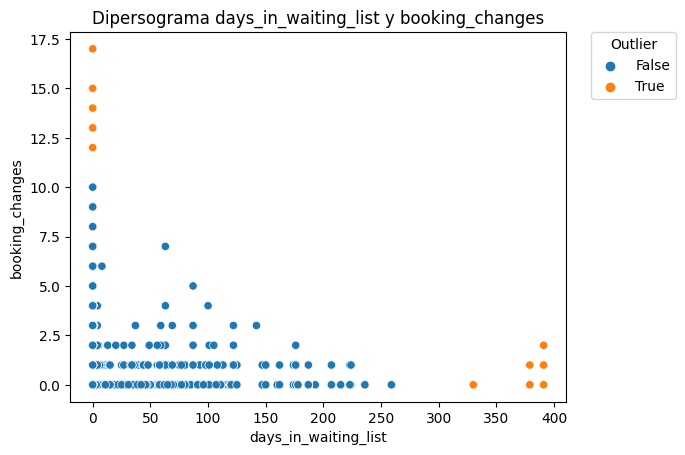

In [ ]:
es_outlier = (mahal['mahalanobis']>280)

sns.scatterplot(x=ds_wait.days_in_waiting_list,
                y=ds_wait.booking_changes,
                hue=es_outlier)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dipersograma days_in_waiting_list y booking_changes' )
plt.show()

In [ ]:
es_outlier_0 = dsHotelCopy[((dsHotelCopy['days_in_waiting_list'] >300 ) & (dsHotelCopy['booking_changes'] <5 ))]
imprimir_porcentaje_obs(es_outlier_0,'days_in_waiting_list >300 y booking_changes <5 ', dsHotelCopy)

es_outlier_1 = dsHotelCopy[((dsHotelCopy['days_in_waiting_list'] == 0 ) & (dsHotelCopy['booking_changes'] >10 ))]
imprimir_porcentaje_obs(es_outlier_1,'days_in_waiting_list =0 y booking_changes >10 ', dsHotelCopy)

se encontraron 45 casos de days_in_waiting_list >300 y booking_changes <5  representan 0.07442198921708067% del total de observaciones
se encontraron 7 casos de days_in_waiting_list =0 y booking_changes >10  representan 0.011576753878212548% del total de observaciones


en vista de los muy pocos casos y que queremos evitar ruido en el modelo, decidimos eliminarlos

In [ ]:
#Los eliminamos
dsHotelCopy.drop(es_outlier_0.index, inplace = True)
dsHotelCopy.reset_index(drop=True)
dsHotelCopy.drop(es_outlier_1.index, inplace = True)
dsHotelCopy.reset_index(drop=True)
print()

In [ ]:
#Estado del dataset al finalizar la limpieza
dsHotelCopy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60414 entries, 0 to 61912
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           60414 non-null  object 
 1   lead_time                       60414 non-null  int64  
 2   arrival_date_year               60414 non-null  int64  
 3   arrival_date_month              60414 non-null  int64  
 4   arrival_date_day_of_month       60414 non-null  int64  
 5   stays_in_weekend_nights         60414 non-null  int64  
 6   stays_in_week_nights            60414 non-null  int64  
 7   adults                          60414 non-null  int64  
 8   children                        60414 non-null  Int64  
 9   babies                          60414 non-null  int64  
 10  meal                            60414 non-null  object 
 11  country                         60414 non-null  object 
 12  market_segment                  

In [ ]:
#Exportamos el ds para usarlo en el  CHP2
dsHotelCopy.to_csv("dsHotelCHP1.csv",index=False)